<a href="https://colab.research.google.com/github/RMCV-Rajapaksha/TeamInception_Datathon/blob/main/task2_eda_and_data_preprocessing_LSTM_2_optimization_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1 Notebook for "insert model name here"


## Imports and Setup

**Import the Libararies**


In [1]:
import pandas as pd
import os
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

### Connecting to Google Drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


### Reading data set files

In [3]:
# Developers please update the paths according to were in your google you place datasets
# i recommend making Rootcode-ML folder and in it Datasets folder and placing the csv files there then you wont have to change below code block
bookings_data = pd.read_csv('/content/drive/MyDrive/Rootcode-ML/Datasets/bookings_train.csv')
tasks_data = pd.read_csv('/content/drive/MyDrive/Rootcode-ML/Datasets/tasks.csv')
staffing_data = pd.read_csv('/content/drive/MyDrive/Rootcode-ML/Datasets/staffing_train.csv')

In [4]:
bookings_data.head()

,booking_id,citizen_id,booking_date,appointment_date,appointment_time,check_in_time,check_out_time,task_id,num_documents,queue_number,satisfaction_rating
0,f7b59ba3793fea61282cb02be2247cebd0a75306,4229044420,2021-01-01,2021-01-01,09:03,2021-01-01 09:11:00,2021-01-01 09:48:15.166353269,TASK-002,0,2,4
1,cfe30d53b4b645e4cb6b114f6c9d74a0f25e6a80,5389442635,2021-01-01,2021-01-01,09:12,2021-01-01 09:24:00,2021-01-01 10:24:12.189261137,TASK-001,1,1,4
2,0fb0a5d9b3944dd743a9e7828dc03fa74aa6ebf8,2123783919,2021-01-01,2021-01-01,09:36,2021-01-01 09:29:00,2021-01-01 10:26:48.802260864,TASK-002,1,6,5
3,d4bf826153212fa325ad98b215668ab942365607,6359918966,2021-01-01,2021-01-01,09:45,2021-01-01 10:07:00,2021-01-01 11:00:13.485642822,TASK-001,1,4,4
4,ebb4c9687acbaf65376d8e379bd1341d1c15127e,178732202,2021-01-01,2021-01-01,10:12,2021-01-01 10:26:00,2021-01-01 11:54:53.260180213,TASK-002,1,8,3


## EDA


### EDA of Bookings data

lets take a look at the columns and some of their values

In [5]:
staffing_data.head()

,date,section_id,employees_on_duty,total_task_time_minutes
0,2021-01-01,SEC-001,1,834.569483
1,2021-01-01,SEC-002,4,1525.368990
2,2021-01-01,SEC-003,2,662.095279
3,2021-01-01,SEC-004,4,1499.112620
4,2021-01-01,SEC-005,3,1238.533073


In [6]:
staffing_data.describe()

,employees_on_duty,total_task_time_minutes
count,5802.000000,5802.000000
mean,4.458807,1662.296769
std,2.794417,1147.134643
min,1.000000,91.109596
25%,3.000000,859.104314
50%,4.000000,1358.176924
75%,6.000000,2123.936358
max,26.000000,10658.173092


removing unnecessary columns. We wont need the total_task_time_minutes because this data wont be provided as input from the test datasets. We need the date and section_id  because they will be to calculate the actual target value (the thing to be predicted) for task 2.

In [7]:
staffing_data = staffing_data.drop(['total_task_time_minutes'],axis=1)

now lets look at the new table headers again.


In [8]:
staffing_data.head()

,date,section_id,employees_on_duty
0,2021-01-01,SEC-001,1
1,2021-01-01,SEC-002,4
2,2021-01-01,SEC-003,2
3,2021-01-01,SEC-004,4
4,2021-01-01,SEC-005,3


lets get a better idea of how null values have been distributed amoung the columns

In [9]:
staffing_data.isna().sum()

,0
date,0
section_id,0
employees_on_duty,0


## Data Preprocessing


### Rearrangement and processing of columns

### Dataset seperation according to section_id

In [10]:
task_counts = staffing_data.groupby("section_id").size().reset_index(name="count")
task_counts

,section_id,count
0,SEC-001,967
1,SEC-002,967
2,SEC-003,967
3,SEC-004,967
4,SEC-005,967
5,SEC-006,967


In [11]:
sec_1_data = staffing_data[staffing_data['section_id'] == 'SEC-001'].copy()
sec_2_data = staffing_data[staffing_data['section_id'] == 'SEC-002'].copy()
sec_3_data = staffing_data[staffing_data['section_id'] == 'SEC-003'].copy()
sec_4_data = staffing_data[staffing_data['section_id'] == 'SEC-004'].copy()
sec_5_data = staffing_data[staffing_data['section_id'] == 'SEC-005'].copy()
sec_6_data = staffing_data[staffing_data['section_id'] == 'SEC-006'].copy()


In [12]:
sec_6_data.head()

,date,section_id,employees_on_duty
5,2021-01-01,SEC-006,11
11,2021-01-04,SEC-006,6
17,2021-01-05,SEC-006,5
23,2021-01-06,SEC-006,10
29,2021-01-07,SEC-006,5


In [13]:
sec_1_data = sec_1_data.drop(['section_id'], axis=1)
sec_2_data = sec_2_data.drop(['section_id'], axis=1)
sec_3_data = sec_3_data.drop(['section_id'], axis=1)
sec_4_data = sec_4_data.drop(['section_id'], axis=1)
sec_5_data = sec_5_data.drop(['section_id'], axis=1)
sec_6_data = sec_6_data.drop(['section_id'], axis=1)

In [14]:
sec_1_data.head()

,date,employees_on_duty
0,2021-01-01,1
6,2021-01-04,1
12,2021-01-05,4
18,2021-01-06,2
24,2021-01-07,2


Comparing different outlier detection methods:

🔍 Testing IQR method with threshold 1.5
LSTM TIME SERIES FORECASTING - WITH OUTLIER DETECTION (IQR)

📊 Processing Section 1
--------------------------------------------------
Outlier Detection (iqr):
  Original training samples: 160
  Outliers detected: 0 (0.00%)
  IQR bounds: [-0.50, 35.50]
  Final training samples: 160
  Test samples (unchanged): 40
Final training samples: 120, Test samples: 40
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step

📈 Training Metrics:
  MSE: 11.9384
  RMSE: 3.4552
  MAE: 2.2283
  R²: 0.6546
  MAPE: 13.8605
  Directional_Accuracy: 51.2605

📉 Test Metrics:
  MSE: 7.2892
  RMSE: 2.6998
  MAE: 2.2658
  R²: 0.5354
  MAPE: 8.1174
  Directional_Accuracy: 58.9744

📊 Processing Section 2
--------------------------------------------------
Outlier Detection (iqr):
  Original training samples: 160
  Outliers detected: 4 (2.50%)
  IQR bounds: [7.00, 39.00]
  Final training samples: 156
  Test 

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step

📈 Training Metrics:
  MSE: 10.7924
  RMSE: 3.2852
  MAE: 2.5292
  R²: 0.6745
  MAPE: 9.0856
  Directional_Accuracy: 47.8261

📉 Test Metrics:
  MSE: 6.0311
  RMSE: 2.4558
  MAE: 1.9956
  R²: 0.7123
  MAPE: 5.3127
  Directional_Accuracy: 58.9744

📊 Processing Section 4
--------------------------------------------------
Outlier Detection (iqr):
  Original training samples: 160
  Outliers detected: 2 (1.25%)
  IQR bounds: [14.50, 50.50]
  Final training samples: 158
  Test samples (unchanged): 40
Final training samples: 118, Test samples: 40
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

📈 Training Metrics:
  MSE: 8.8359
  RMSE: 2.9725
  MAE: 2.3593
  R²: 0.6570
  MAPE: 7.0142
  Directional_Accuracy: 52.1368

📉 Test Metrics:
  MSE: 8.8368
  RMSE: 2.9727
  MAE: 2.4366
  R²: 0.4247
  MAPE: 5.5400
  Directional_Accuracy: 61.5385

📊 Processing Section 5
---------------------------------

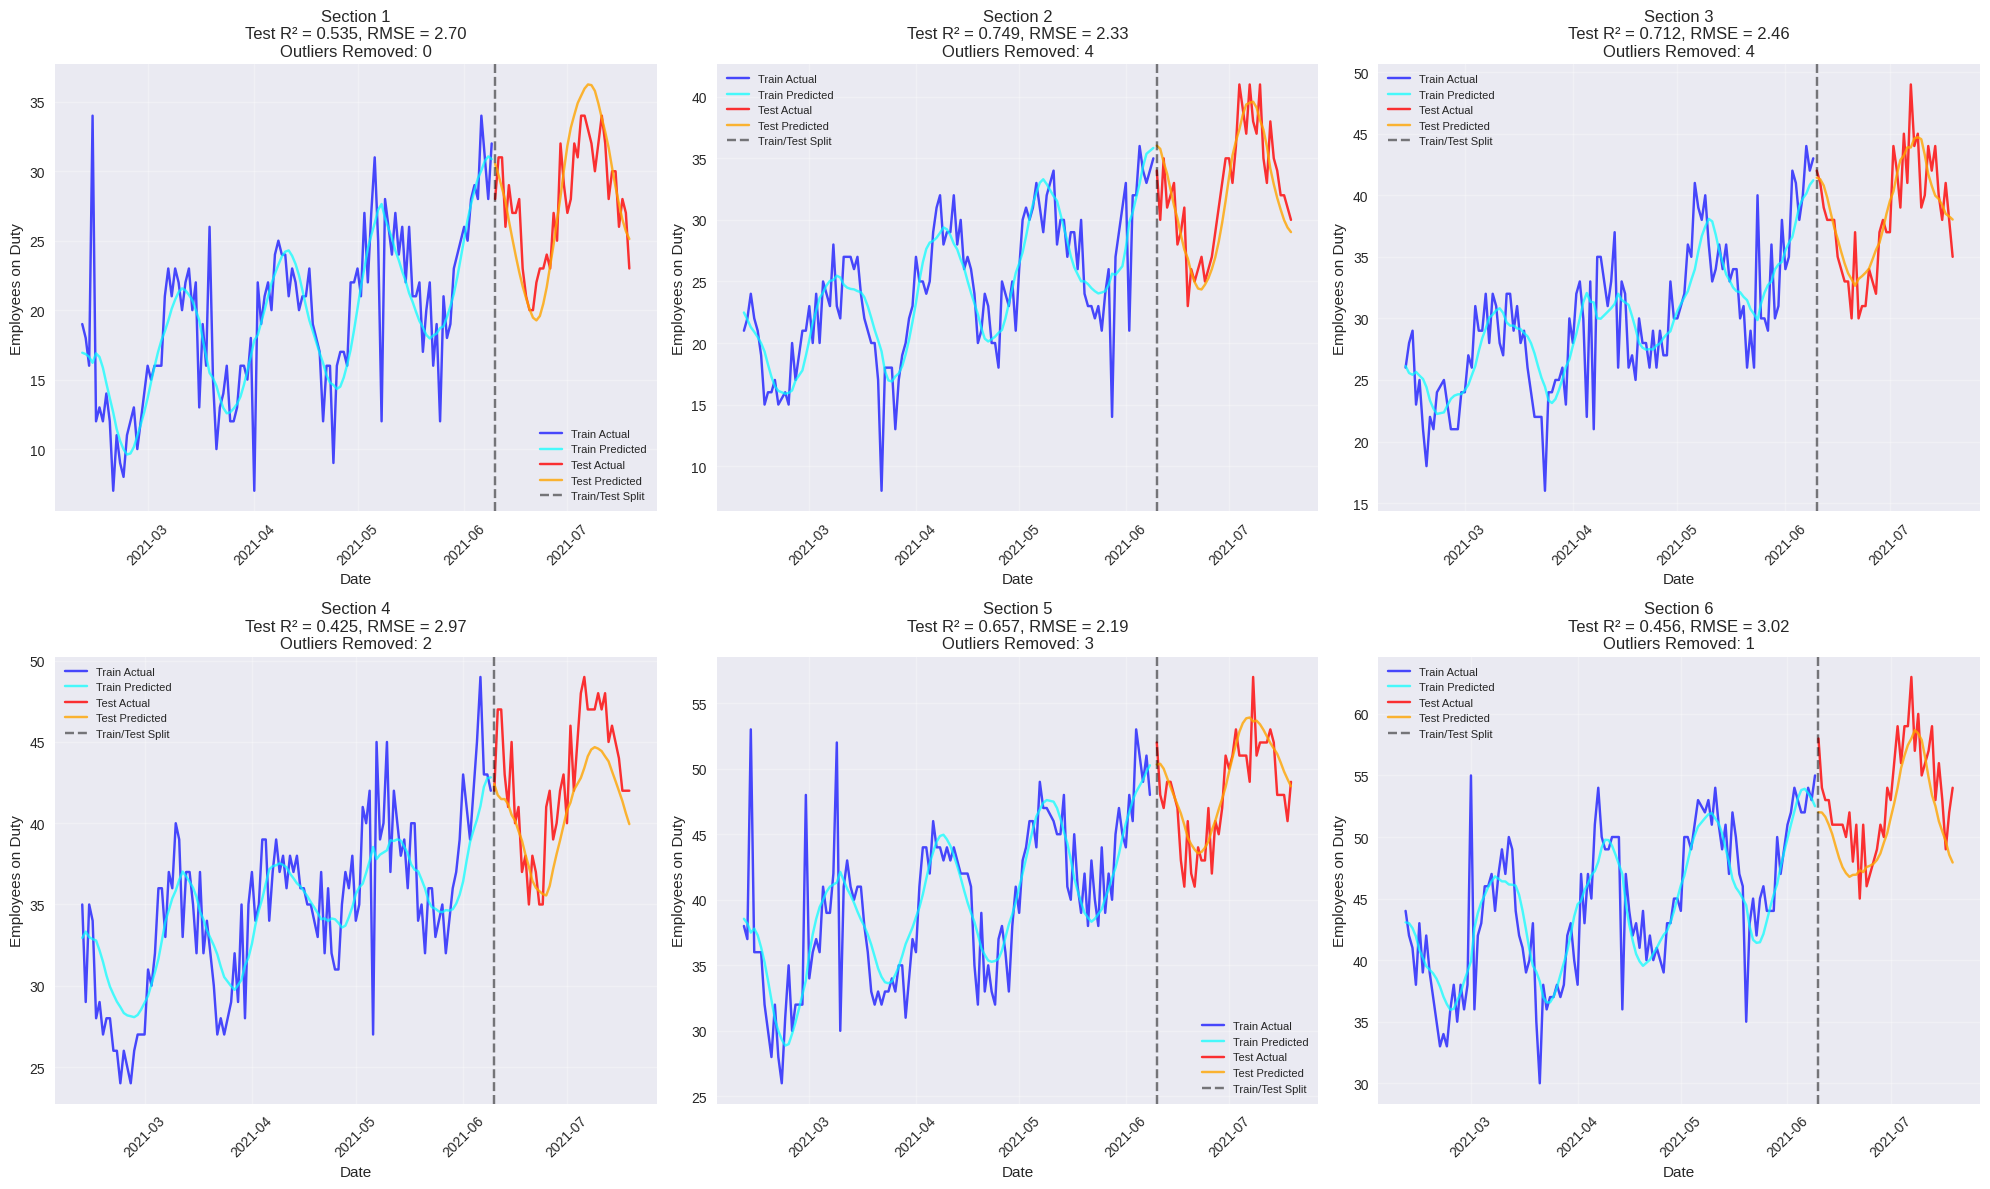


📊 MODELS COMPARISON SUMMARY

Total Outliers Removed Across All Sections: 14

Test Set Performance Comparison:
           Test_R²  Test_RMSE  Test_MAE  Test_MAPE  Directional_Accuracy  \
Section 1   0.5354     2.6998    2.2658     8.1174               58.9744   
Section 2   0.7495     2.3278    1.9689     6.1105               58.9744   
Section 3   0.7123     2.4558    1.9956     5.3127               58.9744   
Section 4   0.4247     2.9727    2.4366     5.5400               61.5385   
Section 5   0.6567     2.1893    1.7641     3.7380               53.8462   
Section 6   0.4559     3.0178    2.5145     4.6529               56.4103   

           Outliers_Removed  
Section 1               0.0  
Section 2               4.0  
Section 3               4.0  
Section 4               2.0  
Section 5               3.0  
Section 6               1.0  

🏆 Best Performing Model: Section 2 (R² = 0.7495)

🔍 Testing ZSCORE method with threshold 3
LSTM TIME SERIES FORECASTING - WITH OUTLIER DETECTION 

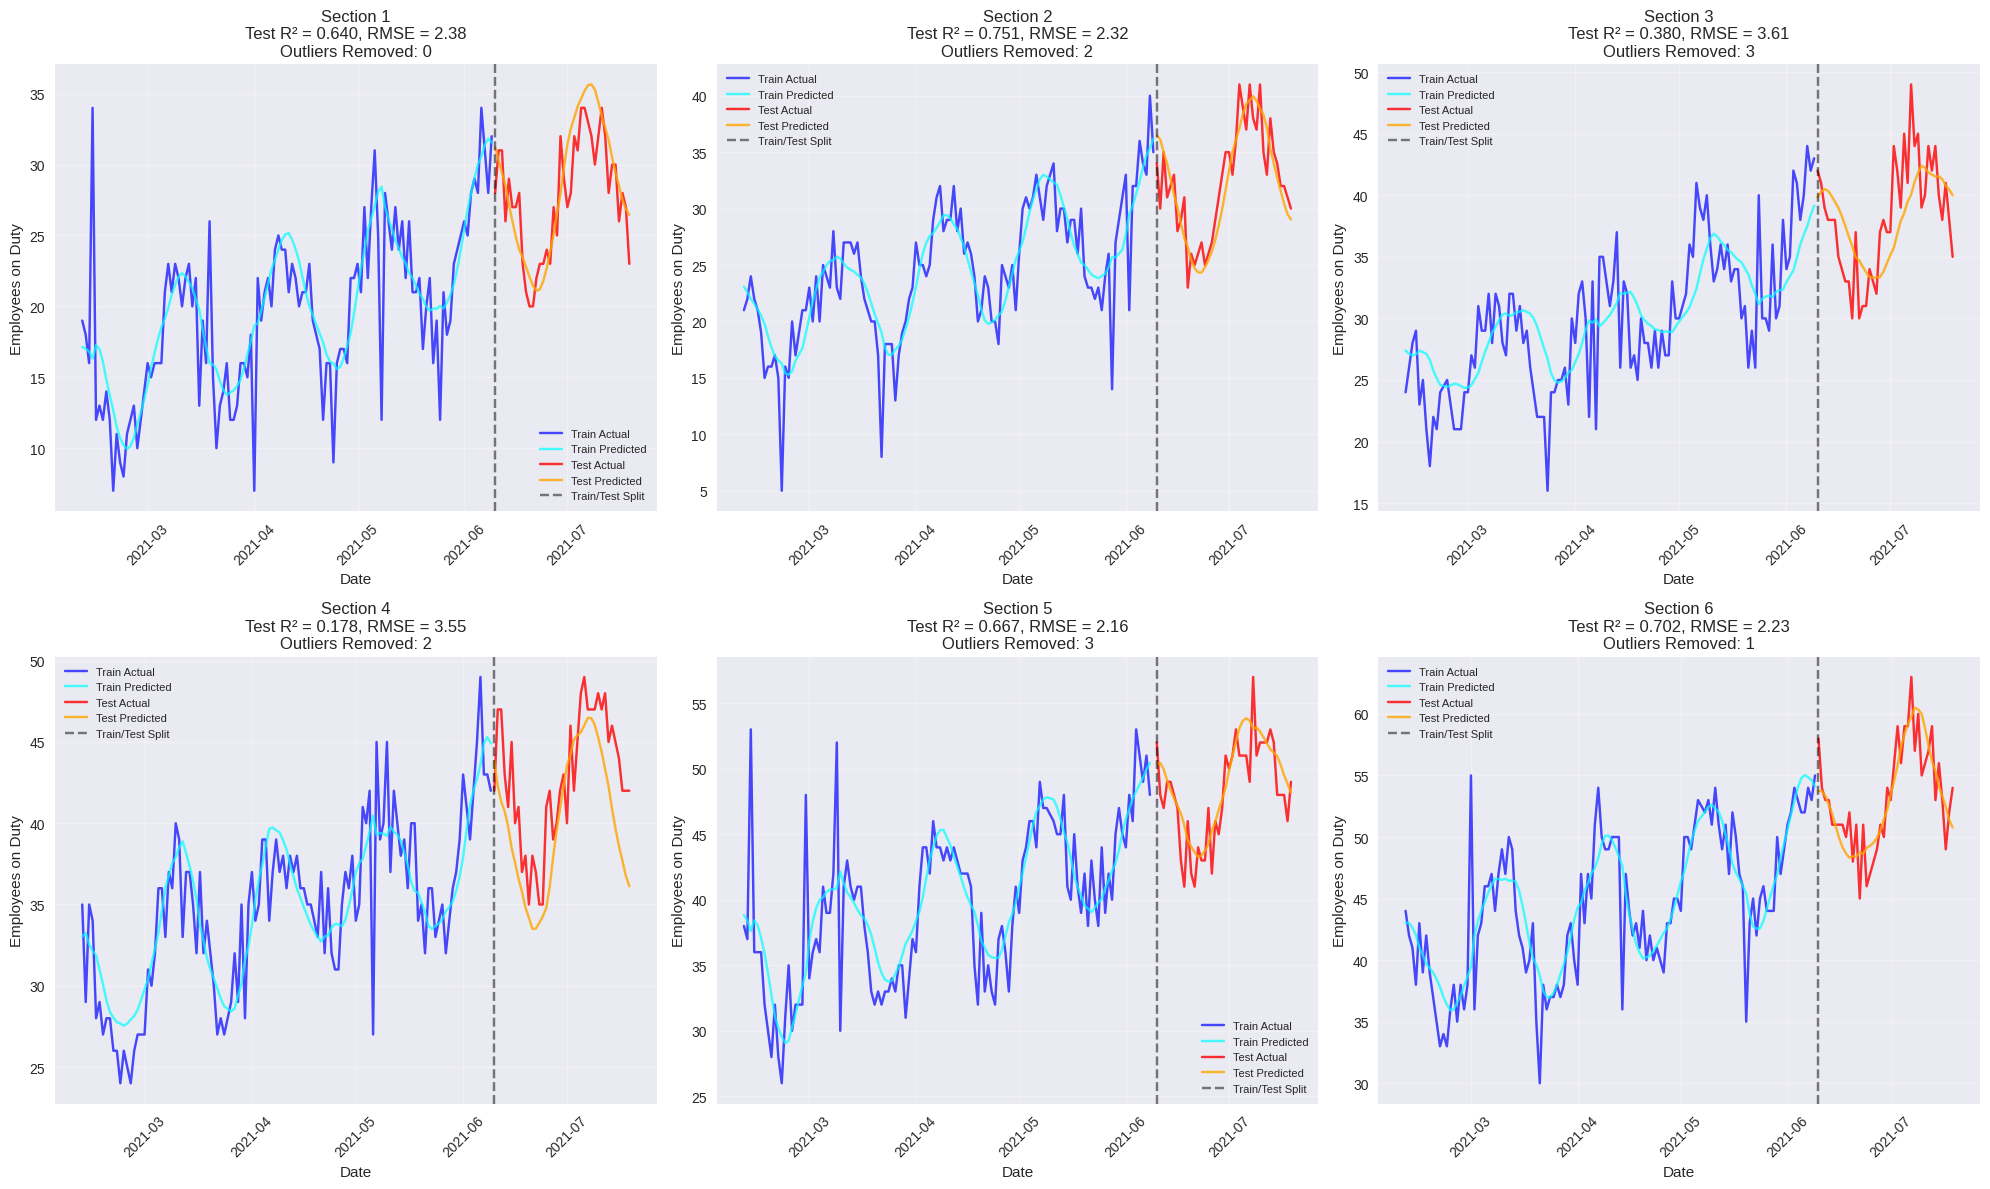


📊 MODELS COMPARISON SUMMARY

Total Outliers Removed Across All Sections: 11

Test Set Performance Comparison:
           Test_R²  Test_RMSE  Test_MAE  Test_MAPE  Directional_Accuracy  \
Section 1   0.6403     2.3755    1.9698     7.1903               56.4103   
Section 2   0.7506     2.3223    1.9106     5.9429               58.9744   
Section 3   0.3798     3.6054    3.0101     7.9483               53.8462   
Section 4   0.1783     3.5527    2.9960     6.9860               58.9744   
Section 5   0.6668     2.1568    1.7230     3.6458               56.4103   
Section 6   0.7016     2.2347    1.8019     3.4013               53.8462   

           Outliers_Removed  
Section 1               0.0  
Section 2               2.0  
Section 3               3.0  
Section 4               2.0  
Section 5               3.0  
Section 6               1.0  

🏆 Best Performing Model: Section 2 (R² = 0.7506)

🔍 Testing MODIFIED_ZSCORE method with threshold 3.5
LSTM TIME SERIES FORECASTING - WITH OUTLIER

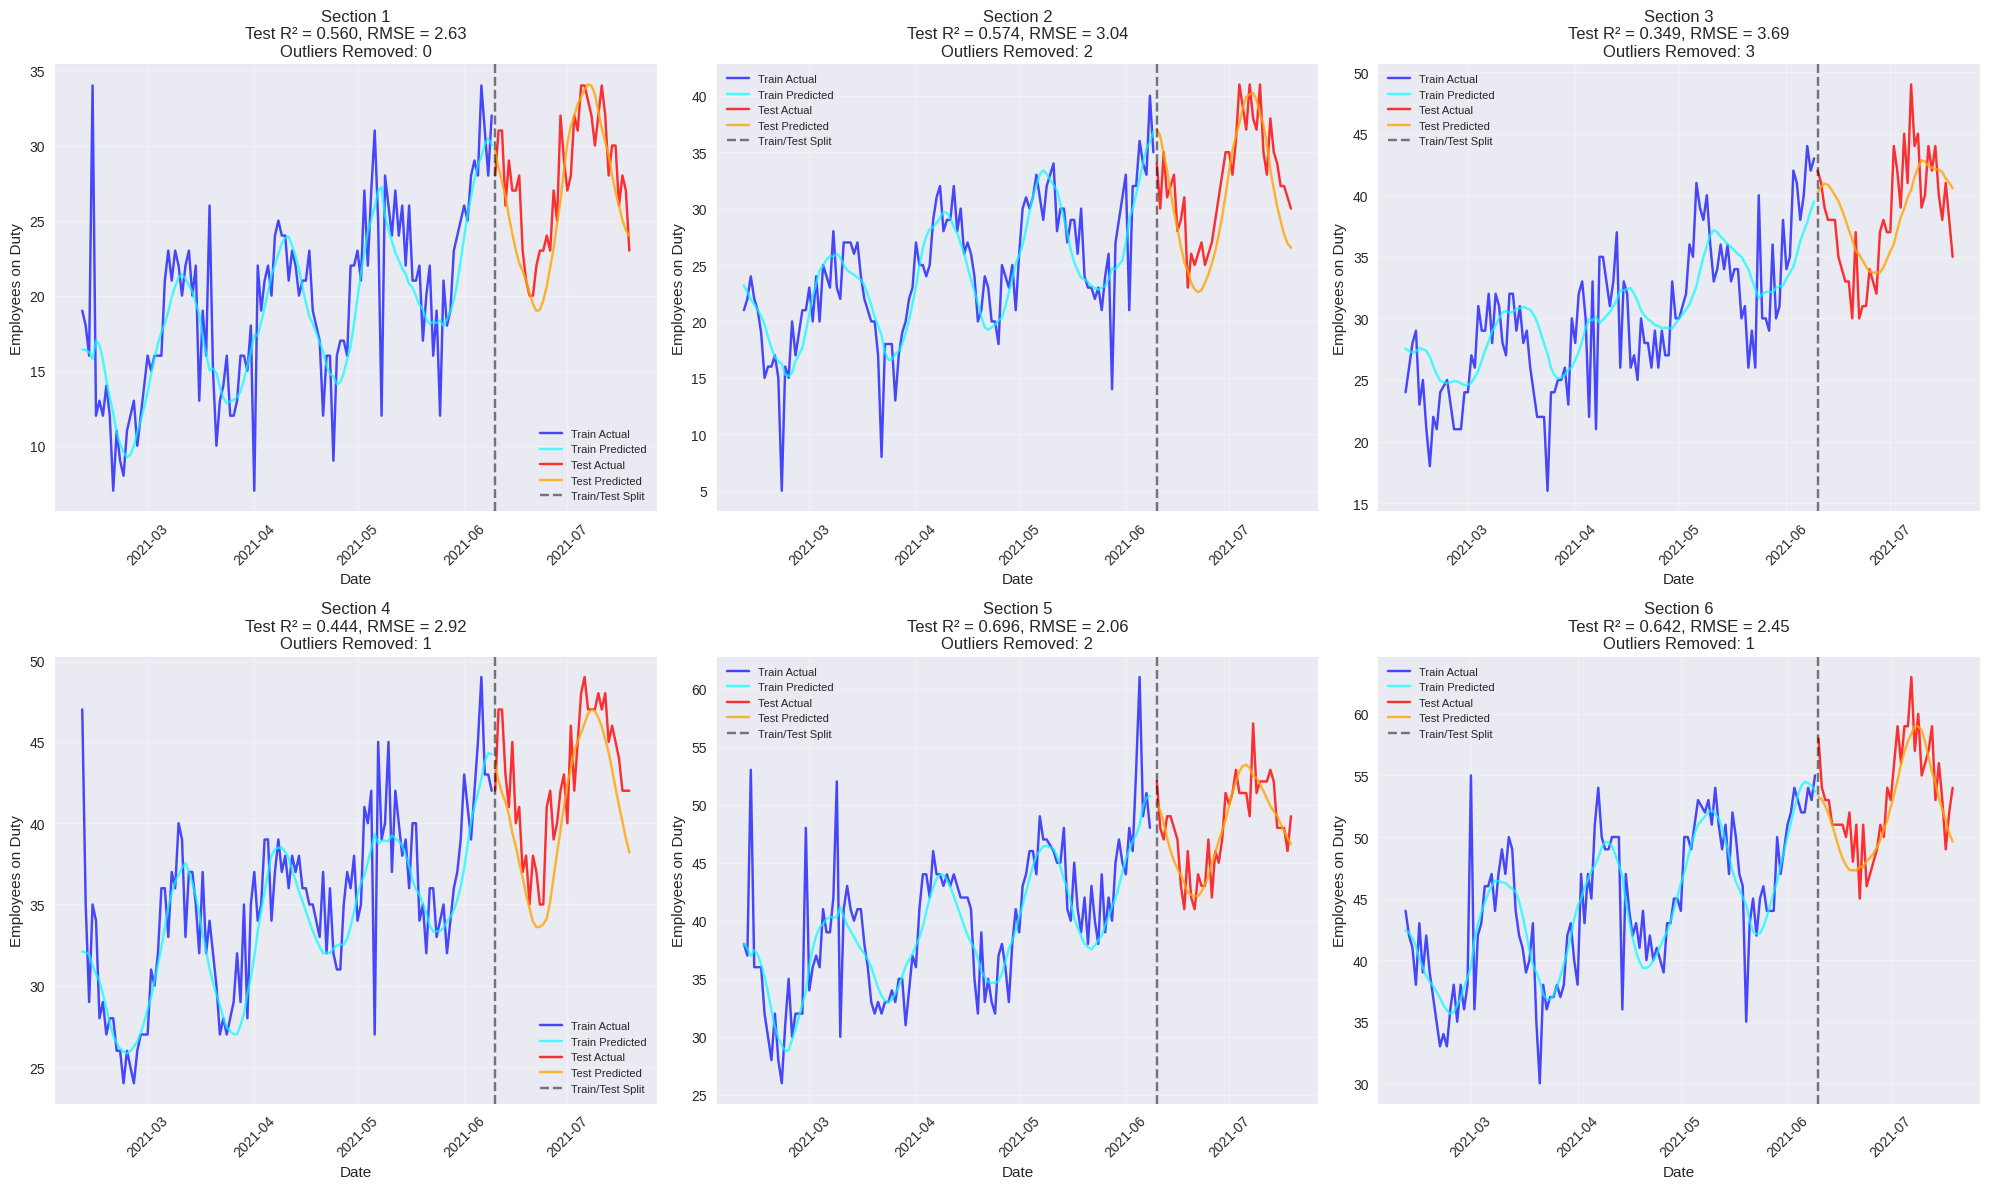


📊 MODELS COMPARISON SUMMARY

Total Outliers Removed Across All Sections: 9

Test Set Performance Comparison:
           Test_R²  Test_RMSE  Test_MAE  Test_MAPE  Directional_Accuracy  \
Section 1   0.5601     2.6268    2.1363     7.7358               58.9744   
Section 2   0.5737     3.0363    2.6928     8.5039               61.5385   
Section 3   0.3490     3.6939    3.0910     8.2499               51.2821   
Section 4   0.4442     2.9219    2.3842     5.6026               61.5385   
Section 5   0.6963     2.0590    1.6995     3.5097               61.5385   
Section 6   0.6424     2.4463    2.0157     3.7497               58.9744   

           Outliers_Removed  
Section 1               0.0  
Section 2               2.0  
Section 3               3.0  
Section 4               1.0  
Section 5               2.0  
Section 6               1.0  

🏆 Best Performing Model: Section 5 (R² = 0.6963)

🔍 Testing ISOLATION_FOREST method with threshold 0.1
LSTM TIME SERIES FORECASTING - WITH OUTLIER

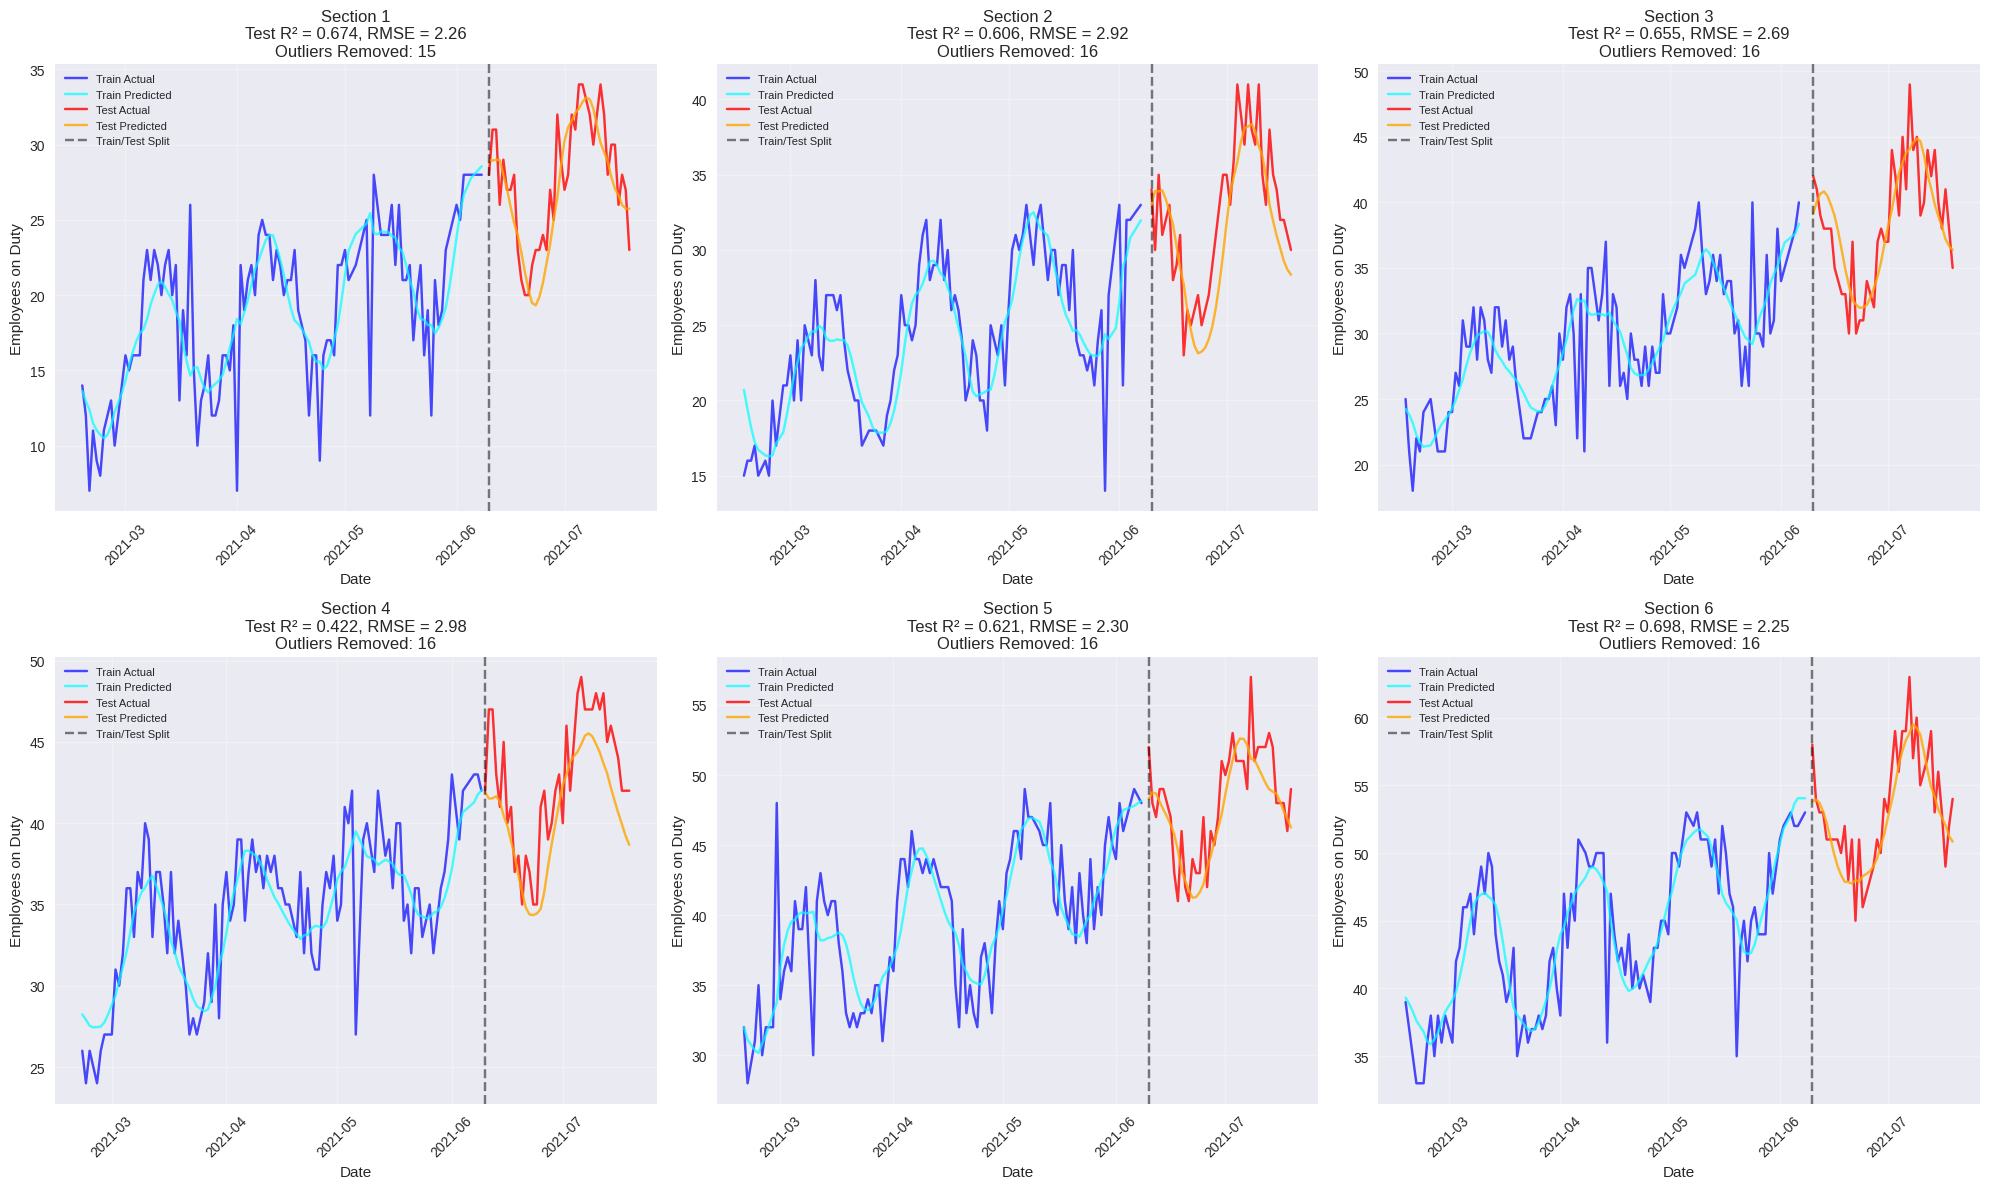


📊 MODELS COMPARISON SUMMARY

Total Outliers Removed Across All Sections: 95

Test Set Performance Comparison:
           Test_R²  Test_RMSE  Test_MAE  Test_MAPE  Directional_Accuracy  \
Section 1   0.6744     2.2602    1.8798     6.9071               53.8462   
Section 2   0.6056     2.9206    2.4995     7.8726               53.8462   
Section 3   0.6551     2.6887    2.2756     5.9872               53.8462   
Section 4   0.4217     2.9803    2.5075     5.7559               58.9744   
Section 5   0.6205     2.3016    1.8788     3.8687               61.5385   
Section 6   0.6979     2.2487    1.7986     3.3501               53.8462   

           Outliers_Removed  
Section 1              15.0  
Section 2              16.0  
Section 3              16.0  
Section 4              16.0  
Section 5              16.0  
Section 6              16.0  

🏆 Best Performing Model: Section 6 (R² = 0.6979)

📈 OUTLIER DETECTION METHODS COMPARISON
                      Avg_R²  Avg_RMSE  Total_Outliers_R

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

class OutlierDetector:
    """Class for detecting outliers using multiple methods"""

    @staticmethod
    def iqr_method(data, multiplier=1.5):
        """Detect outliers using IQR method"""
        Q1 = np.percentile(data, 25)
        Q3 = np.percentile(data, 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        outliers_mask = (data < lower_bound) | (data > upper_bound)
        return outliers_mask, lower_bound, upper_bound

    @staticmethod
    def zscore_method(data, threshold=3):
        """Detect outliers using Z-score method"""
        z_scores = np.abs(stats.zscore(data))
        outliers_mask = z_scores > threshold
        return outliers_mask

    @staticmethod
    def modified_zscore_method(data, threshold=3.5):
        """Detect outliers using Modified Z-score method (more robust)"""
        median = np.median(data)
        mad = np.median(np.abs(data - median))
        modified_z_scores = 0.6745 * (data - median) / mad
        outliers_mask = np.abs(modified_z_scores) > threshold
        return outliers_mask

    @staticmethod
    def isolation_forest_method(data, contamination=0.1):
        """Detect outliers using Isolation Forest"""
        from sklearn.ensemble import IsolationForest
        iso_forest = IsolationForest(contamination=contamination, random_state=42)
        outliers = iso_forest.fit_predict(data.reshape(-1, 1))
        outliers_mask = outliers == -1
        return outliers_mask

class TimeSeriesLSTM:
    def __init__(self, lookbook_window=50, lstm_units=30, epochs=100, batch_size=64,
                 outlier_method='iqr', outlier_threshold=1.5):
        self.lookback_window = lookbook_window
        self.lstm_units = lstm_units
        self.epochs = epochs
        self.batch_size = batch_size
        self.outlier_method = outlier_method
        self.outlier_threshold = outlier_threshold
        self.model = None
        self.scaler = MinMaxScaler()
        self.train_predictions = None
        self.test_predictions = None
        self.outliers_removed = 0

    def detect_and_remove_outliers(self, data, target_column='employees_on_duty',
                                 split_idx=None, visualize=True):
        """Detect and remove outliers from training data only"""
        if split_idx is None:
            # If no split index provided, use 80% for training
            split_idx = int(len(data) * 0.8)

        # Separate training and test data
        train_data = data.iloc[:split_idx].copy()
        test_data = data.iloc[split_idx:].copy()

        original_train_size = len(train_data)
        target_values = train_data[target_column].values

        # Detect outliers using specified method
        if self.outlier_method == 'iqr':
            outliers_mask, lower_bound, upper_bound = OutlierDetector.iqr_method(
                target_values, self.outlier_threshold)
            outlier_info = f"IQR bounds: [{lower_bound:.2f}, {upper_bound:.2f}]"
        elif self.outlier_method == 'zscore':
            outliers_mask = OutlierDetector.zscore_method(target_values, self.outlier_threshold)
            outlier_info = f"Z-score threshold: {self.outlier_threshold}"
        elif self.outlier_method == 'modified_zscore':
            outliers_mask = OutlierDetector.modified_zscore_method(target_values, self.outlier_threshold)
            outlier_info = f"Modified Z-score threshold: {self.outlier_threshold}"
        elif self.outlier_method == 'isolation_forest':
            outliers_mask = OutlierDetector.isolation_forest_method(target_values, self.outlier_threshold)
            outlier_info = f"Isolation Forest contamination: {self.outlier_threshold}"
        else:
            outliers_mask = np.zeros(len(target_values), dtype=bool)
            outlier_info = "No outlier detection"

        # Count outliers
        num_outliers = np.sum(outliers_mask)
        self.outliers_removed = num_outliers

        print(f"Outlier Detection ({self.outlier_method}):")
        print(f"  Original training samples: {original_train_size}")
        print(f"  Outliers detected: {num_outliers} ({num_outliers/original_train_size*100:.2f}%)")
        print(f"  {outlier_info}")

        # Remove outliers from training data only
        clean_train_data = train_data[~outliers_mask].reset_index(drop=True)

        # Combine clean training data with unchanged test data
        cleaned_data = pd.concat([clean_train_data, test_data], ignore_index=True)

        print(f"  Final training samples: {len(clean_train_data)}")
        print(f"  Test samples (unchanged): {len(test_data)}")

        # Visualization
        if visualize and num_outliers > 0:
            fig, axes = plt.subplots(1, 2, figsize=(15, 5))

            # Before outlier removal
            axes[0].plot(train_data['date'], train_data[target_column], 'b-', alpha=0.7, label='Training Data')
            axes[0].scatter(train_data.loc[outliers_mask, 'date'],
                          train_data.loc[outliers_mask, target_column],
                          color='red', s=50, label=f'Outliers ({num_outliers})')
            axes[0].plot(test_data['date'], test_data[target_column], 'g-', alpha=0.7, label='Test Data')
            axes[0].set_title('Before Outlier Removal')
            axes[0].set_xlabel('Date')
            axes[0].set_ylabel(target_column.replace('_', ' ').title())
            axes[0].legend()
            axes[0].grid(True, alpha=0.3)

            # After outlier removal
            axes[1].plot(clean_train_data['date'], clean_train_data[target_column], 'b-', alpha=0.7, label='Clean Training Data')
            axes[1].plot(test_data['date'], test_data[target_column], 'g-', alpha=0.7, label='Test Data')
            axes[1].set_title('After Outlier Removal')
            axes[1].set_xlabel('Date')
            axes[1].set_ylabel(target_column.replace('_', ' ').title())
            axes[1].legend()
            axes[1].grid(True, alpha=0.3)

            plt.tight_layout()
            plt.show()

        return cleaned_data, len(clean_train_data)

    def prepare_data(self, data, target_column='employees_on_duty'):
        """Prepare data for LSTM training"""
        # Ensure date column is datetime
        data['date'] = pd.to_datetime(data['date'])
        data = data.sort_values('date')

        # Scale the data
        values = data[target_column].values.reshape(-1, 1)
        scaled_values = self.scaler.fit_transform(values)

        # Create sequences
        X, y = [], []
        for i in range(self.lookback_window, len(scaled_values)):
            X.append(scaled_values[i-self.lookback_window:i, 0])
            y.append(scaled_values[i, 0])

        X, y = np.array(X), np.array(y)
        X = X.reshape((X.shape[0], X.shape[1], 1))

        return X, y, data['date'].iloc[self.lookback_window:].reset_index(drop=True)

    def split_data(self, X, y, dates, clean_train_size):
        """Split data into train and test sets based on clean training size"""
        # Adjust split based on the clean training data size
        # We need to account for the lookback window
        adjusted_split_idx = clean_train_size - self.lookback_window

        # Ensure we don't exceed the available data
        adjusted_split_idx = max(0, min(adjusted_split_idx, len(X)))

        X_train, X_test = X[:adjusted_split_idx], X[adjusted_split_idx:]
        y_train, y_test = y[:adjusted_split_idx], y[adjusted_split_idx:]
        train_dates = dates[:adjusted_split_idx]
        test_dates = dates[adjusted_split_idx:]

        return X_train, X_test, y_train, y_test, train_dates, test_dates

    def build_model(self, input_shape):
        """Build LSTM model"""
        model = Sequential([
            LSTM(self.lstm_units, return_sequences=True, input_shape=input_shape),
            Dropout(0.2),
            LSTM(self.lstm_units, return_sequences=False),
            Dropout(0.2),
            Dense(25),
            Dense(1)
        ])

        model.compile(optimizer=Adam(learning_rate=0.001),
                     loss='mean_squared_error',
                     metrics=['mae'])

        return model

    def train(self, X_train, y_train, X_test, y_test):
        """Train the LSTM model"""
        self.model = self.build_model((X_train.shape[1], 1))

        history = self.model.fit(
            X_train, y_train,
            epochs=self.epochs,
            batch_size=self.batch_size,
            validation_data=(X_test, y_test),
            verbose=0,
            shuffle=False
        )

        return history

    def predict(self, X_train, X_test):
        """Make predictions"""
        train_pred_scaled = self.model.predict(X_train)
        test_pred_scaled = self.model.predict(X_test)

        # Inverse transform predictions
        self.train_predictions = self.scaler.inverse_transform(train_pred_scaled)
        self.test_predictions = self.scaler.inverse_transform(test_pred_scaled)

        return self.train_predictions, self.test_predictions

    def calculate_metrics(self, y_true, y_pred):
        """Calculate evaluation metrics"""
        # Inverse transform actual values
        y_true_original = self.scaler.inverse_transform(y_true.reshape(-1, 1))

        mse = mean_squared_error(y_true_original, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_true_original, y_pred)
        r2 = r2_score(y_true_original, y_pred)

        # Additional time series metrics
        mape = np.mean(np.abs((y_true_original - y_pred) / y_true_original)) * 100

        # Directional accuracy
        true_direction = np.diff(y_true_original.flatten()) > 0
        pred_direction = np.diff(y_pred.flatten()) > 0
        directional_accuracy = np.mean(true_direction == pred_direction) * 100

        return {
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'R²': r2,
            'MAPE': mape,
            'Directional_Accuracy': directional_accuracy
        }

def train_and_evaluate_models(datasets, section_names, outlier_method='iqr', outlier_threshold=1.5):
    """Train LSTM models for all sections with outlier detection"""

    models = {}
    results = {}

    # Create subplot figure for all sections
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    axes = axes.flatten()

    print("=" * 80)
    print(f"LSTM TIME SERIES FORECASTING - WITH OUTLIER DETECTION ({outlier_method.upper()})")
    print("=" * 80)

    total_outliers_removed = 0

    for i, (data, section_name) in enumerate(zip(datasets, section_names)):
        print(f"\n📊 Processing {section_name}")
        print("-" * 50)

        # Initialize LSTM model with outlier detection
        lstm_model = TimeSeriesLSTM(
            lookbook_window=40,
            lstm_units=60,
            epochs=100,
            outlier_method=outlier_method,
            outlier_threshold=outlier_threshold
        )

        # Detect and remove outliers from training data only
        cleaned_data, clean_train_size = lstm_model.detect_and_remove_outliers(
            data, target_column='employees_on_duty', visualize=False
        )

        total_outliers_removed += lstm_model.outliers_removed

        # Prepare data
        X, y, dates = lstm_model.prepare_data(cleaned_data)
        X_train, X_test, y_train, y_test, train_dates, test_dates = lstm_model.split_data(
            X, y, dates, clean_train_size
        )

        print(f"Final training samples: {len(X_train)}, Test samples: {len(X_test)}")

        # Train model
        history = lstm_model.train(X_train, y_train, X_test, y_test)

        # Make predictions
        train_pred, test_pred = lstm_model.predict(X_train, X_test)

        # Calculate metrics
        train_metrics = lstm_model.calculate_metrics(y_train, train_pred)
        test_metrics = lstm_model.calculate_metrics(y_test, test_pred)

        # Store results
        models[section_name] = lstm_model
        results[section_name] = {
            'train_metrics': train_metrics,
            'test_metrics': test_metrics,
            'history': history,
            'dates': {'train': train_dates, 'test': test_dates},
            'actual': {'train': lstm_model.scaler.inverse_transform(y_train.reshape(-1, 1)),
                      'test': lstm_model.scaler.inverse_transform(y_test.reshape(-1, 1))},
            'predicted': {'train': train_pred, 'test': test_pred},
            'outliers_removed': lstm_model.outliers_removed
        }

        # Print metrics
        print(f"\n📈 Training Metrics:")
        for metric, value in train_metrics.items():
            print(f"  {metric}: {value:.4f}")

        print(f"\n📉 Test Metrics:")
        for metric, value in test_metrics.items():
            print(f"  {metric}: {value:.4f}")

        # Plot results
        ax = axes[i]

        # Plot actual vs predicted
        ax.plot(train_dates, results[section_name]['actual']['train'],
                label='Train Actual', color='blue', alpha=0.7)
        ax.plot(train_dates, results[section_name]['predicted']['train'],
                label='Train Predicted', color='cyan', alpha=0.7)
        ax.plot(test_dates, results[section_name]['actual']['test'],
                label='Test Actual', color='red', alpha=0.8)
        ax.plot(test_dates, results[section_name]['predicted']['test'],
                label='Test Predicted', color='orange', alpha=0.8)

        ax.axvline(x=test_dates.iloc[0], color='black', linestyle='--', alpha=0.5, label='Train/Test Split')
        ax.set_title(f'{section_name}\nTest R² = {test_metrics["R²"]:.3f}, RMSE = {test_metrics["RMSE"]:.2f}\nOutliers Removed: {lstm_model.outliers_removed}')
        ax.set_xlabel('Date')
        ax.set_ylabel('Employees on Duty')
        ax.legend(fontsize=8)
        ax.grid(True, alpha=0.3)

        # Rotate x-axis labels for better readability
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

    plt.tight_layout()
    plt.show()

    # Summary comparison
    print("\n" + "=" * 80)
    print("📊 MODELS COMPARISON SUMMARY")
    print("=" * 80)

    summary_df = pd.DataFrame({
        section: {
            'Test_R²': results[section]['test_metrics']['R²'],
            'Test_RMSE': results[section]['test_metrics']['RMSE'],
            'Test_MAE': results[section]['test_metrics']['MAE'],
            'Test_MAPE': results[section]['test_metrics']['MAPE'],
            'Directional_Accuracy': results[section]['test_metrics']['Directional_Accuracy'],
            'Outliers_Removed': results[section]['outliers_removed']
        } for section in section_names
    }).T

    print(f"\nTotal Outliers Removed Across All Sections: {total_outliers_removed}")
    print("\nTest Set Performance Comparison:")
    print(summary_df.round(4))

    # Best performing model
    best_model = summary_df['Test_R²'].idxmax()
    print(f"\n🏆 Best Performing Model: {best_model} (R² = {summary_df.loc[best_model, 'Test_R²']:.4f})")

    return models, results, summary_df

# Create sample data with outliers for demonstration
def create_sample_data_with_outliers():
    """Create sample data with intentional outliers"""
    datasets = []
    section_names = ['Section 1', 'Section 2', 'Section 3', 'Section 4', 'Section 5', 'Section 6']

    np.random.seed(42)  # For reproducible results

    for i in range(6):
        dates = pd.date_range('2021-01-01', periods=200, freq='D')

        # Create synthetic time series data with trend and seasonality
        trend = np.linspace(10, 30, 200)
        seasonal = 5 * np.sin(2 * np.pi * np.arange(200) / 30)  # Monthly seasonality
        noise = np.random.normal(0, 2, 200)
        employees = trend + seasonal + noise + (i * 5)  # Different base levels for each section

        # Add some outliers (only to first 80% of data - training portion)
        train_size = int(0.8 * len(employees))
        outlier_indices = np.random.choice(train_size, size=max(1, train_size//20), replace=False)

        for idx in outlier_indices:
            if np.random.random() > 0.5:
                employees[idx] += np.random.normal(15, 5)  # Positive outlier
            else:
                employees[idx] -= np.random.normal(10, 3)  # Negative outlier

        employees = np.maximum(employees, 1)  # Ensure positive values

        df = pd.DataFrame({
            'date': dates,
            'employees_on_duty': employees.astype(int)
        })
        datasets.append(df)

    return datasets, section_names

# Example usage with different outlier detection methods
if __name__ == "__main__":
    # Create sample data with outliers
    datasets, section_names = create_sample_data_with_outliers()

    # Test different outlier detection methods
    outlier_methods = [
        ('iqr', 1.5),
        ('zscore', 3),
        ('modified_zscore', 3.5),
        ('isolation_forest', 0.1)
    ]

    # Compare results with and without outlier detection
    print("Comparing different outlier detection methods:")
    print("=" * 80)

    all_results = {}

    for method, threshold in outlier_methods:
        print(f"\n🔍 Testing {method.upper()} method with threshold {threshold}")
        models, results, summary = train_and_evaluate_models(
            datasets, section_names, outlier_method=method, outlier_threshold=threshold
        )
        all_results[f"{method}_{threshold}"] = {
            'avg_r2': summary['Test_R²'].mean(),
            'avg_rmse': summary['Test_RMSE'].mean(),
            'total_outliers': summary['Outliers_Removed'].sum()
        }

    # Summary of all methods
    print("\n" + "=" * 80)
    print("📈 OUTLIER DETECTION METHODS COMPARISON")
    print("=" * 80)

    comparison_df = pd.DataFrame(all_results).T
    comparison_df.columns = ['Avg_R²', 'Avg_RMSE', 'Total_Outliers_Removed']
    print(comparison_df.round(4))

    best_method = comparison_df['Avg_R²'].idxmax()
    print(f"\n🏆 Best Outlier Detection Method: {best_method}")
    print(f"   Average R²: {comparison_df.loc[best_method, 'Avg_R²']:.4f}")
    print(f"   Average RMSE: {comparison_df.loc[best_method, 'Avg_RMSE']:.4f}")
    print(f"   Total Outliers Removed: {comparison_df.loc[best_method, 'Total_Outliers_Removed']:.0f}")

🚀 Comparing Enhanced LSTM Configurations

1️⃣ Basic LSTM (no additional features)
ENHANCED LSTM TIME SERIES FORECASTING
Outlier Detection: IQR
No additional features
Architecture: Attention=False, BatchNorm=False

📊 Processing Section 1
--------------------------------------------------
🔧 Engineering features...
Outlier Detection (iqr):
  Original training samples: 240
  Outliers detected: 7 (2.92%)
  IQR bounds: [29.38, 62.38]
  Using 0 features: []...
  Final training samples: 193, Test samples: 60
  Input shape: (193, 40, 1)
🚀 Training model...
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

📈 Training Metrics:
  MSE: 27.4443
  RMSE: 5.2387
  MAE: 4.1039
  R²: 0.0531
  MAPE: 8.9264
  Directional_Accuracy: 38.0208

📉 Test Metrics:
  MSE: 24.3523
  RMSE: 4.9348
  MAE: 4.1071
  R²: -0.0297
  MAPE: 9.7197
  Directional_Accuracy: 38.9831

📊 Processing Section 2
--------------------------------------------------
🔧 Engineering features...
Outlier Detection (iqr

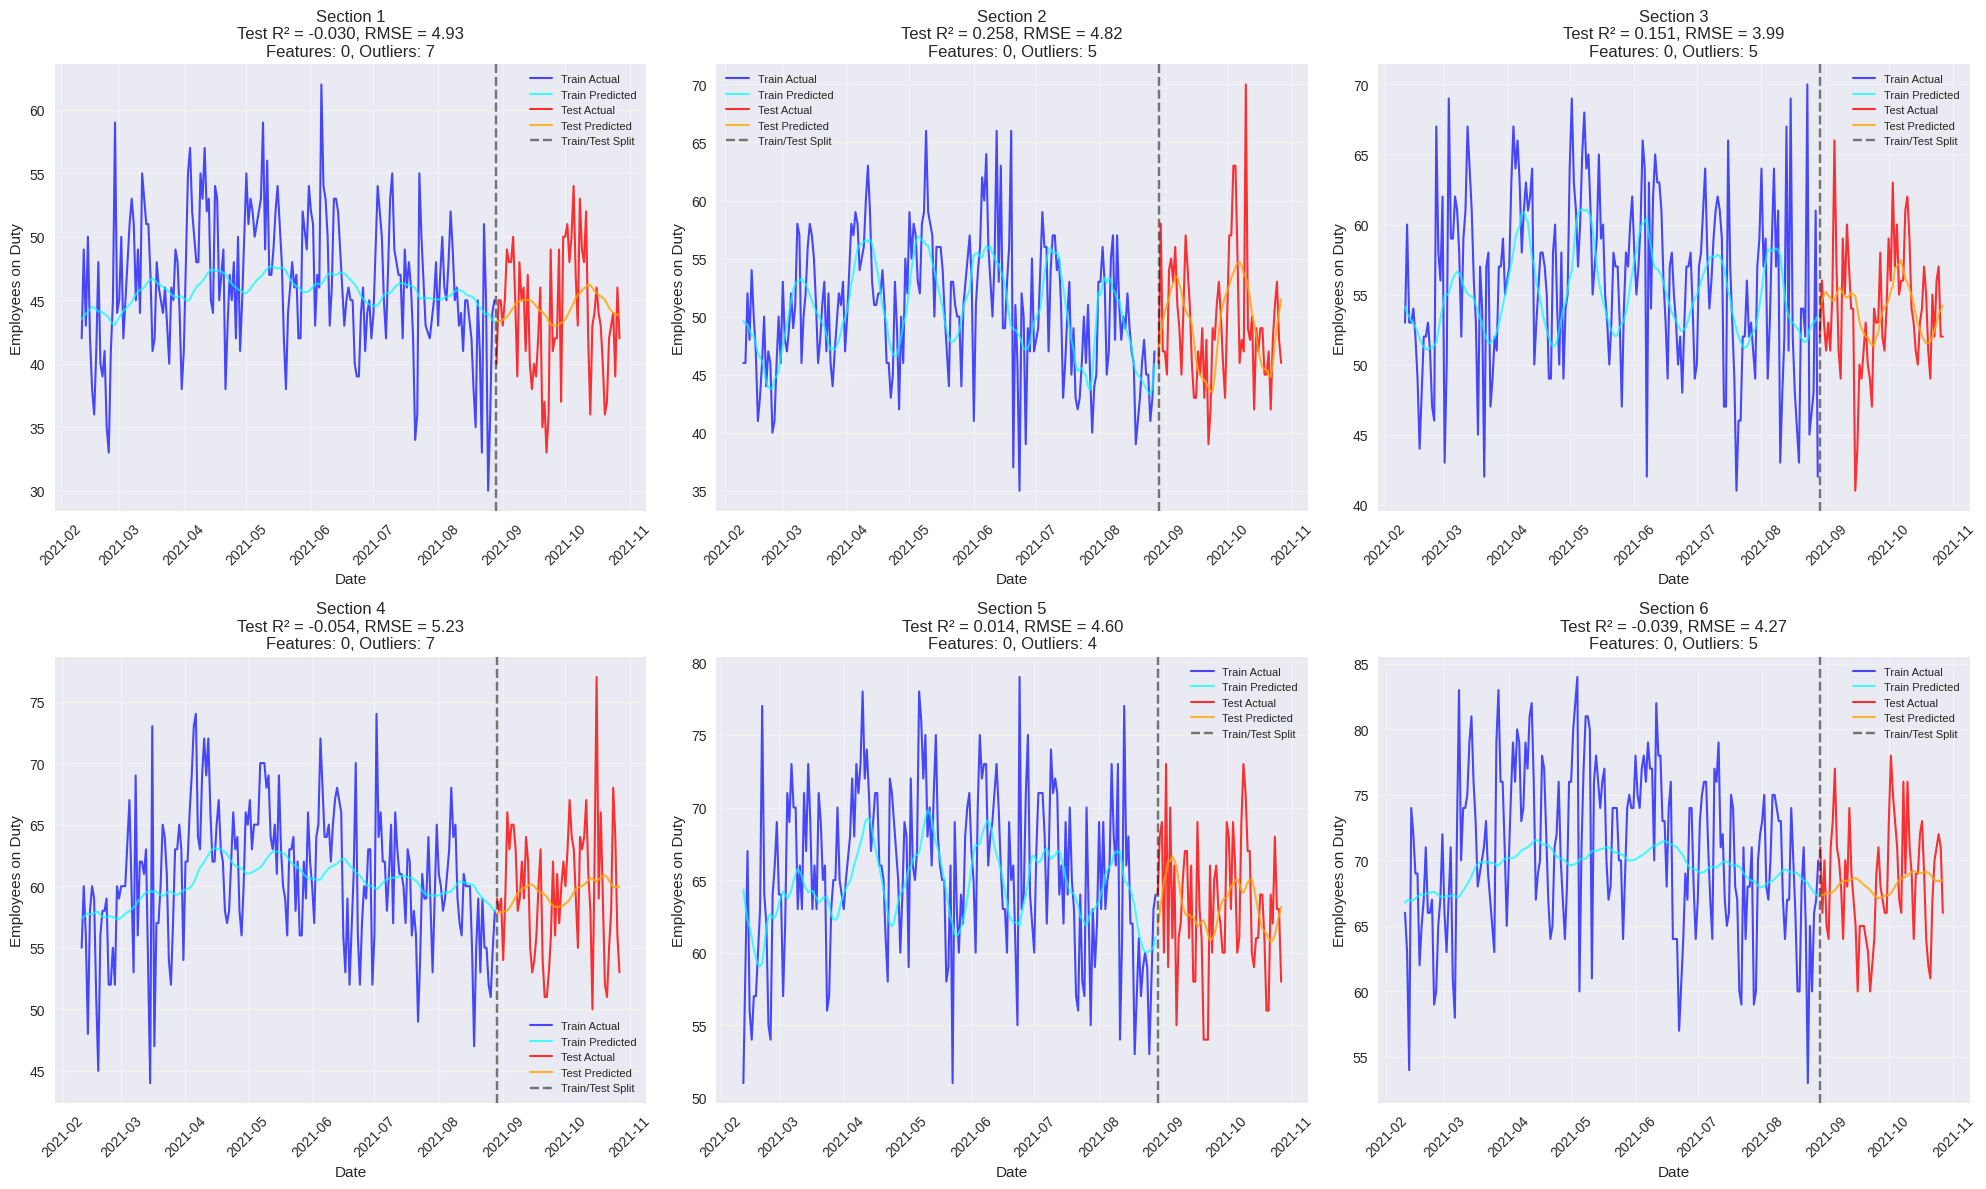


📊 ENHANCED MODELS COMPARISON SUMMARY

Total Outliers Removed: 33
Average Features Used: 0.0

Test Set Performance Comparison:
           Test_R²  Test_RMSE  Test_MAE  Test_MAPE  Directional_Accuracy  \
Section 1  -0.0297     4.9348    4.1071     9.7197               38.9831   
Section 2   0.2583     4.8221    3.7839     7.5498               52.5424   
Section 3   0.1511     3.9928    3.0116     5.6832               45.7627   
Section 4  -0.0544     5.2262    4.2484     7.1919               40.6780   
Section 5   0.0142     4.6008    3.9371     6.3069               32.2034   
Section 6  -0.0394     4.2688    3.4507     5.0569               32.2034   

           Outliers_Removed  Features_Used  
Section 1               7.0            0.0  
Section 2               5.0            0.0  
Section 3               5.0            0.0  
Section 4               7.0            0.0  
Section 5               4.0            0.0  
Section 6               5.0            0.0  

🏆 Best Performing Model:

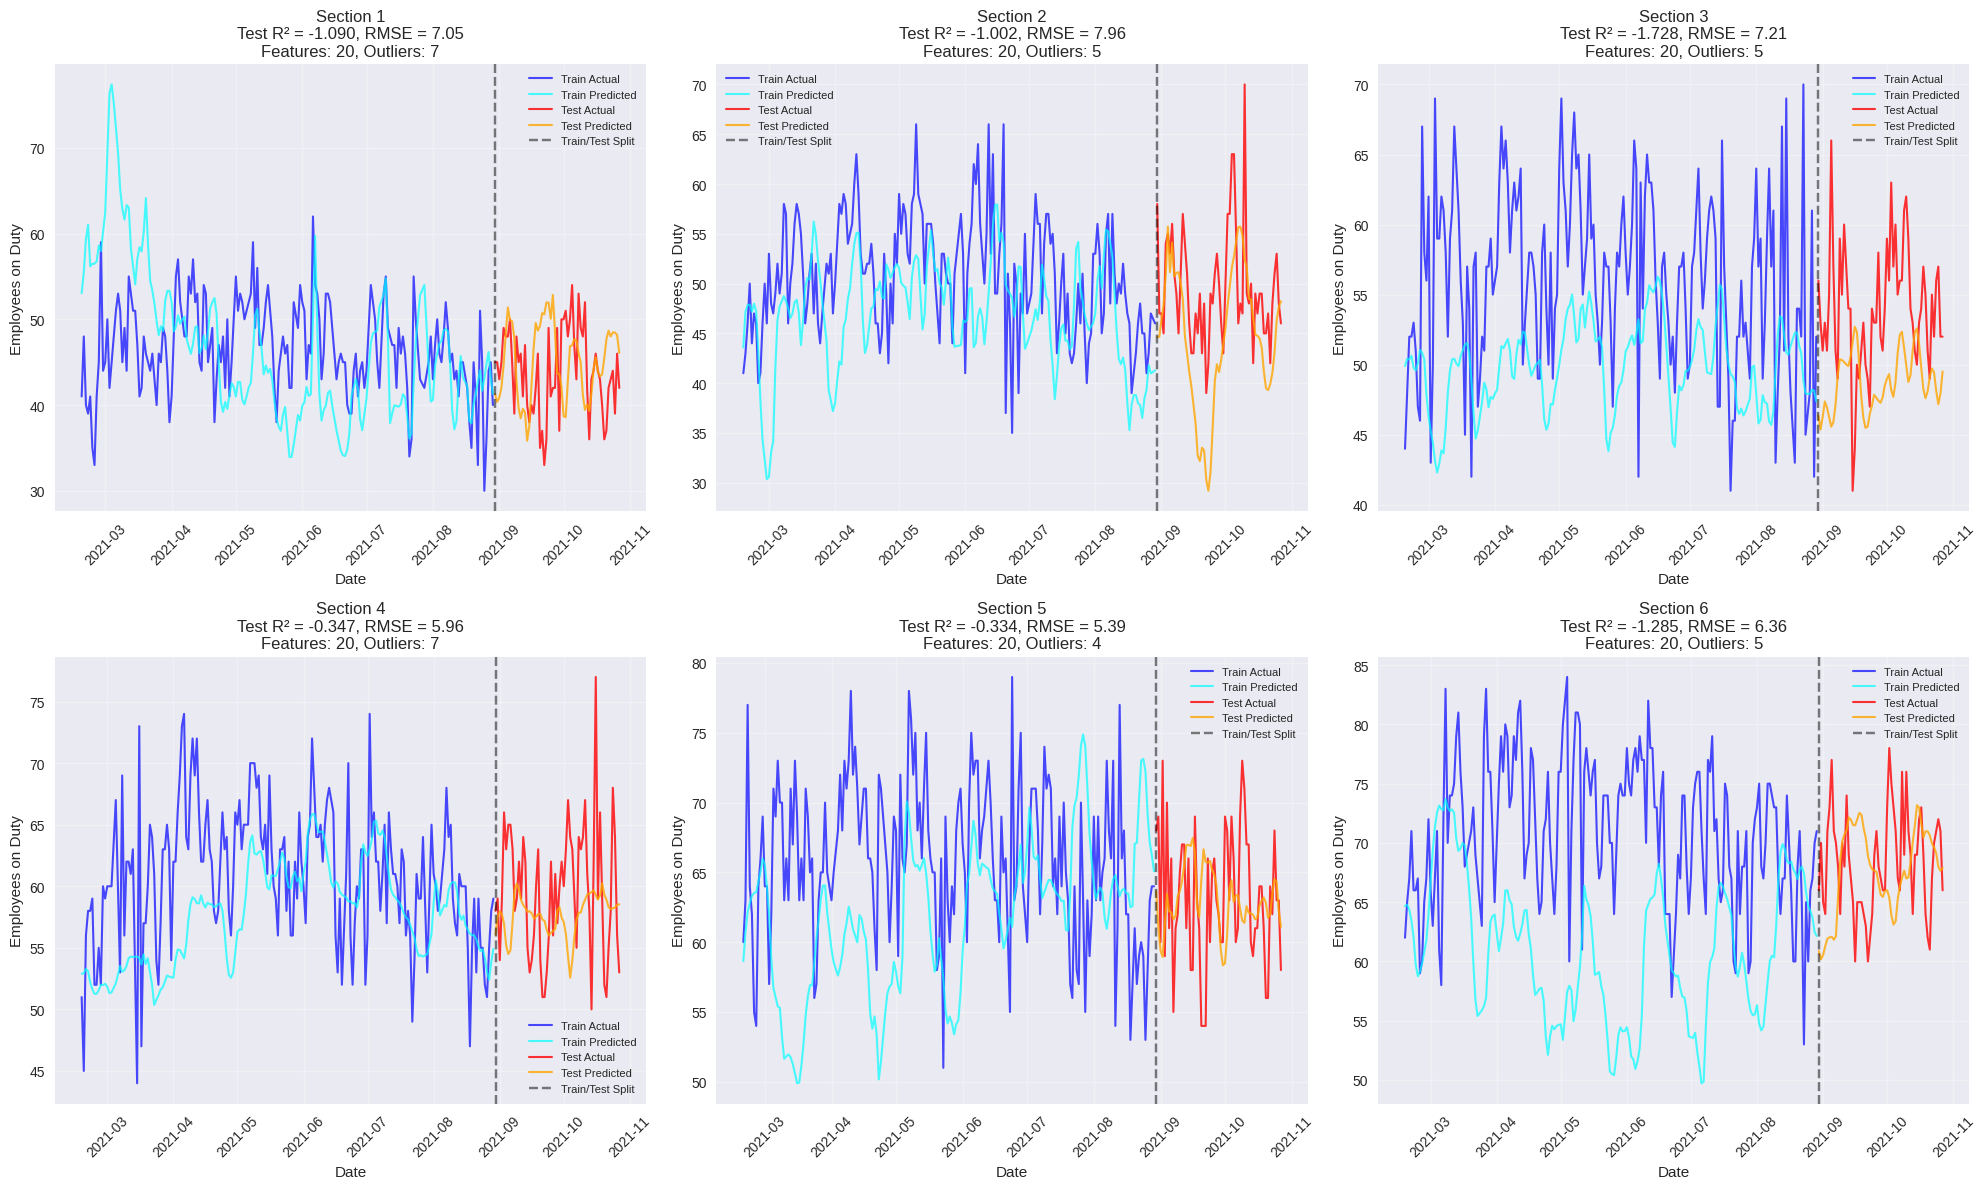


📊 ENHANCED MODELS COMPARISON SUMMARY

Total Outliers Removed: 33
Average Features Used: 20.0

Test Set Performance Comparison:
           Test_R²  Test_RMSE  Test_MAE  Test_MAPE  Directional_Accuracy  \
Section 1  -1.0897     7.0512    5.6969    13.5336               56.8966   
Section 2  -1.0023     7.9637    6.4743    13.0149               53.4483   
Section 3  -1.7277     7.2054    6.0998    11.0245               37.9310   
Section 4  -0.3473     5.9567    4.7671     7.8374               41.3793   
Section 5  -0.3335     5.3947    3.9780     6.3489               56.8966   
Section 6  -1.2851     6.3615    5.2055     7.6201               44.8276   

           Outliers_Removed  Features_Used  
Section 1               7.0           20.0  
Section 2               5.0           20.0  
Section 3               5.0           20.0  
Section 4               7.0           20.0  
Section 5               4.0           20.0  
Section 6               5.0           20.0  

🏆 Best Performing Model

ValueError: Found array with dim 3. None expected <= 2.

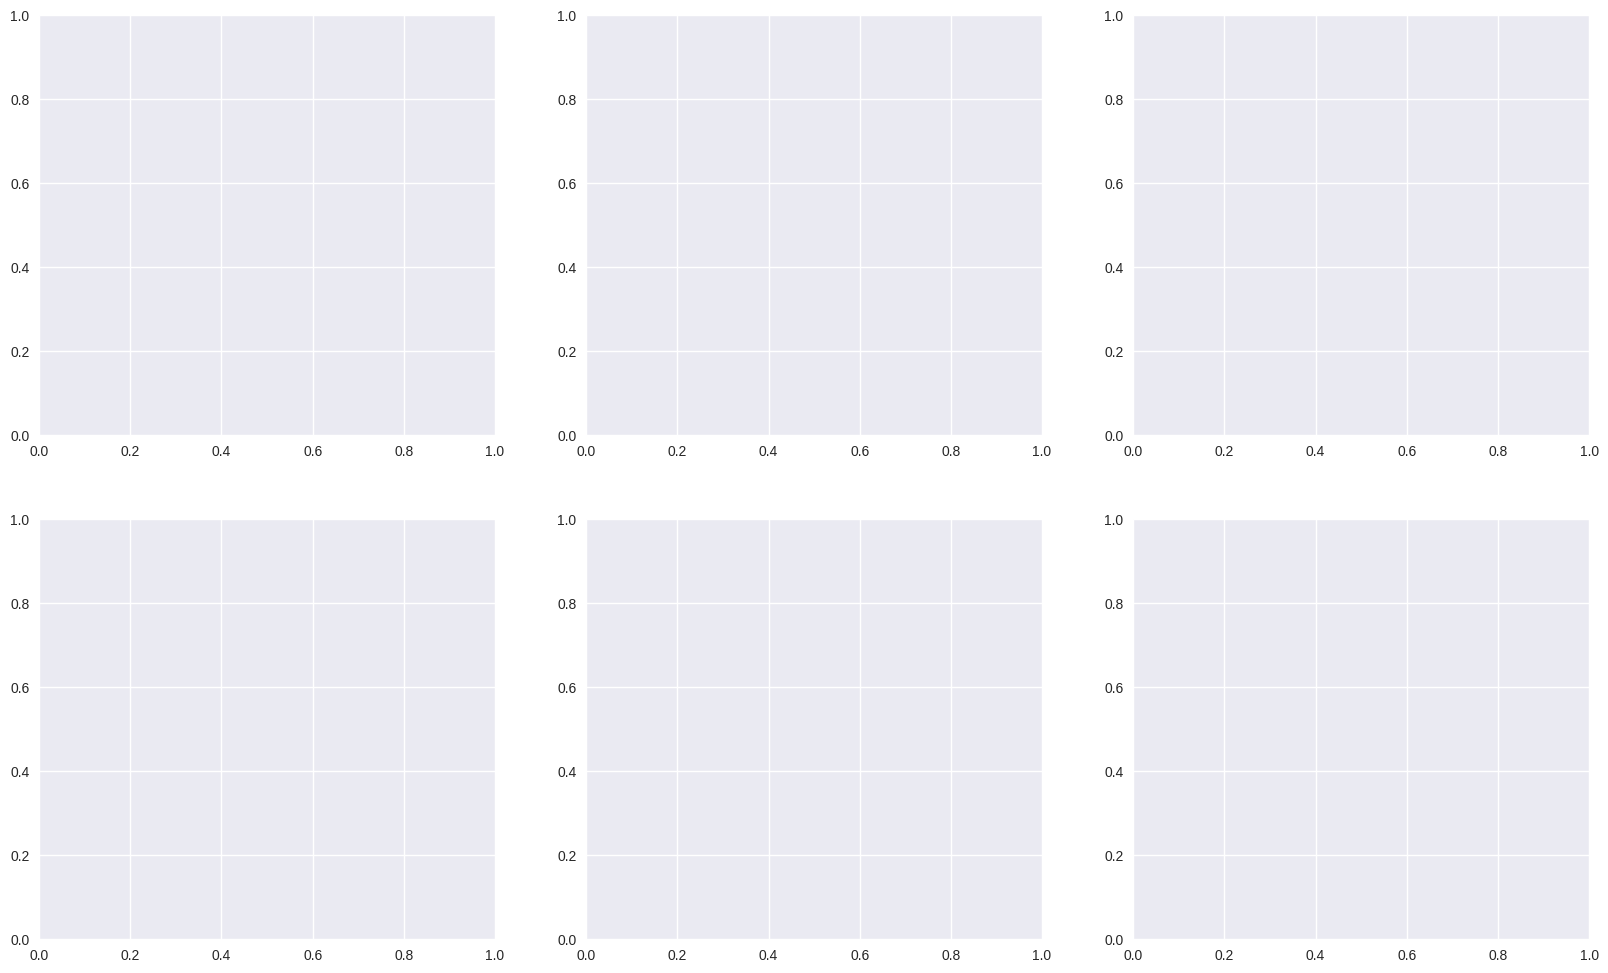

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Attention
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

class FeatureEngineer:
    """Class for creating additional time series features"""

    @staticmethod
    def add_temporal_features(data, date_column='date'):
        """Add time-based features"""
        data = data.copy()
        data[date_column] = pd.to_datetime(data[date_column])

        # Basic temporal features
        data['year'] = data[date_column].dt.year
        data['month'] = data[date_column].dt.month
        data['day'] = data[date_column].dt.day
        data['day_of_week'] = data[date_column].dt.dayofweek
        data['day_of_year'] = data[date_column].dt.dayofyear
        data['week_of_year'] = data[date_column].dt.isocalendar().week
        data['quarter'] = data[date_column].dt.quarter

        # Cyclical encoding for better neural network learning
        data['month_sin'] = np.sin(2 * np.pi * data['month'] / 12)
        data['month_cos'] = np.cos(2 * np.pi * data['month'] / 12)
        data['day_sin'] = np.sin(2 * np.pi * data['day'] / 31)
        data['day_cos'] = np.cos(2 * np.pi * data['day'] / 31)
        data['day_of_week_sin'] = np.sin(2 * np.pi * data['day_of_week'] / 7)
        data['day_of_week_cos'] = np.cos(2 * np.pi * data['day_of_week'] / 7)
        data['day_of_year_sin'] = np.sin(2 * np.pi * data['day_of_year'] / 365)
        data['day_of_year_cos'] = np.cos(2 * np.pi * data['day_of_year'] / 365)

        # Weekend/Weekday flag
        data['is_weekend'] = (data['day_of_week'] >= 5).astype(int)

        return data

    @staticmethod
    def add_lag_features(data, target_column, lags=[1, 2, 3, 7, 14, 30]):
        """Add lagged versions of the target variable"""
        data = data.copy()
        for lag in lags:
            data[f'{target_column}_lag_{lag}'] = data[target_column].shift(lag)
        return data

    @staticmethod
    def add_rolling_features(data, target_column, windows=[3, 7, 14, 30]):
        """Add rolling statistics"""
        data = data.copy()
        for window in windows:
            data[f'{target_column}_rolling_mean_{window}'] = data[target_column].rolling(window=window).mean()
            data[f'{target_column}_rolling_std_{window}'] = data[target_column].rolling(window=window).std()
            data[f'{target_column}_rolling_min_{window}'] = data[target_column].rolling(window=window).min()
            data[f'{target_column}_rolling_max_{window}'] = data[target_column].rolling(window=window).max()
            data[f'{target_column}_rolling_median_{window}'] = data[target_column].rolling(window=window).median()
        return data

    @staticmethod
    def add_difference_features(data, target_column, periods=[1, 7, 30]):
        """Add differencing features to capture trends"""
        data = data.copy()
        for period in periods:
            data[f'{target_column}_diff_{period}'] = data[target_column].diff(periods=period)
            data[f'{target_column}_pct_change_{period}'] = data[target_column].pct_change(periods=period)
        return data

    @staticmethod
    def add_technical_indicators(data, target_column):
        """Add technical analysis indicators"""
        data = data.copy()

        # Simple Moving Average ratios
        data['sma_7'] = data[target_column].rolling(window=7).mean()
        data['sma_14'] = data[target_column].rolling(window=14).mean()
        data['sma_30'] = data[target_column].rolling(window=30).mean()

        # Moving average ratios
        data['price_to_sma_7'] = data[target_column] / data['sma_7']
        data['price_to_sma_14'] = data[target_column] / data['sma_14']
        data['price_to_sma_30'] = data[target_column] / data['sma_30']

        # Bollinger Bands
        data['bb_middle'] = data[target_column].rolling(window=20).mean()
        data['bb_std'] = data[target_column].rolling(window=20).std()
        data['bb_upper'] = data['bb_middle'] + (data['bb_std'] * 2)
        data['bb_lower'] = data['bb_middle'] - (data['bb_std'] * 2)
        data['bb_position'] = (data[target_column] - data['bb_lower']) / (data['bb_upper'] - data['bb_lower'])

        # RSI (Relative Strength Index)
        delta = data[target_column].diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
        rs = gain / loss
        data['rsi'] = 100 - (100 / (1 + rs))

        return data

    @staticmethod
    def add_interaction_features(data, target_column):
        """Add interaction features"""
        data = data.copy()

        # Interaction with temporal features
        if 'month' in data.columns:
            data[f'{target_column}_month_interaction'] = data[target_column] * data['month']
        if 'day_of_week' in data.columns:
            data[f'{target_column}_dow_interaction'] = data[target_column] * data['day_of_week']
        if 'is_weekend' in data.columns:
            data[f'{target_column}_weekend_interaction'] = data[target_column] * data['is_weekend']

        return data

class OutlierDetector:
    """Class for detecting outliers using multiple methods"""

    @staticmethod
    def iqr_method(data, multiplier=1.5):
        """Detect outliers using IQR method"""
        Q1 = np.percentile(data, 25)
        Q3 = np.percentile(data, 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        outliers_mask = (data < lower_bound) | (data > upper_bound)
        return outliers_mask, lower_bound, upper_bound

    @staticmethod
    def zscore_method(data, threshold=3):
        """Detect outliers using Z-score method"""
        z_scores = np.abs(stats.zscore(data))
        outliers_mask = z_scores > threshold
        return outliers_mask

    @staticmethod
    def modified_zscore_method(data, threshold=3.5):
        """Detect outliers using Modified Z-score method (more robust)"""
        median = np.median(data)
        mad = np.median(np.abs(data - median))
        modified_z_scores = 0.6745 * (data - median) / mad
        outliers_mask = np.abs(modified_z_scores) > threshold
        return outliers_mask

class EnhancedTimeSeriesLSTM:
    def __init__(self,
                 lookback_window=50,
                 lstm_units=50,
                 epochs=100,
                 batch_size=32,
                 outlier_method='iqr',
                 outlier_threshold=1.5,
                 use_features=True,
                 feature_types=['temporal', 'lag', 'rolling', 'diff', 'technical'],
                 use_attention=True,
                 use_batch_norm=True,
                 use_early_stopping=True):

        self.lookback_window = lookback_window
        self.lstm_units = lstm_units
        self.epochs = epochs
        self.batch_size = batch_size
        self.outlier_method = outlier_method
        self.outlier_threshold = outlier_threshold
        self.use_features = use_features
        self.feature_types = feature_types
        self.use_attention = use_attention
        self.use_batch_norm = use_batch_norm
        self.use_early_stopping = use_early_stopping

        self.model = None
        self.scaler = MinMaxScaler()
        self.feature_scaler = StandardScaler()
        self.train_predictions = None
        self.test_predictions = None
        self.outliers_removed = 0
        self.feature_columns = []

    def engineer_features(self, data, target_column='employees_on_duty'):
        """Apply feature engineering based on selected types"""
        engineered_data = data.copy()

        if not self.use_features:
            return engineered_data

        if 'temporal' in self.feature_types:
            engineered_data = FeatureEngineer.add_temporal_features(engineered_data)

        if 'lag' in self.feature_types:
            engineered_data = FeatureEngineer.add_lag_features(engineered_data, target_column, lags=[1, 2, 3, 7])

        if 'rolling' in self.feature_types:
            engineered_data = FeatureEngineer.add_rolling_features(engineered_data, target_column, windows=[3, 7, 14])

        if 'diff' in self.feature_types:
            engineered_data = FeatureEngineer.add_difference_features(engineered_data, target_column, periods=[1, 7])

        if 'technical' in self.feature_types:
            engineered_data = FeatureEngineer.add_technical_indicators(engineered_data, target_column)

        if 'interaction' in self.feature_types:
            engineered_data = FeatureEngineer.add_interaction_features(engineered_data, target_column)

        # Remove rows with NaN values created by feature engineering
        initial_length = len(engineered_data)
        engineered_data = engineered_data.dropna().reset_index(drop=True)
        removed_rows = initial_length - len(engineered_data)

        if removed_rows > 0:
            print(f"  Removed {removed_rows} rows due to NaN values from feature engineering")

        return engineered_data

    def detect_and_remove_outliers(self, data, target_column='employees_on_duty',
                                 split_idx=None, visualize=True):
        """Detect and remove outliers from training data only"""
        if split_idx is None:
            split_idx = int(len(data) * 0.8)

        train_data = data.iloc[:split_idx].copy()
        test_data = data.iloc[split_idx:].copy()

        original_train_size = len(train_data)
        target_values = train_data[target_column].values

        # Detect outliers using specified method
        if self.outlier_method == 'iqr':
            outliers_mask, lower_bound, upper_bound = OutlierDetector.iqr_method(
                target_values, self.outlier_threshold)
            outlier_info = f"IQR bounds: [{lower_bound:.2f}, {upper_bound:.2f}]"
        elif self.outlier_method == 'zscore':
            outliers_mask = OutlierDetector.zscore_method(target_values, self.outlier_threshold)
            outlier_info = f"Z-score threshold: {self.outlier_threshold}"
        elif self.outlier_method == 'modified_zscore':
            outliers_mask = OutlierDetector.modified_zscore_method(target_values, self.outlier_threshold)
            outlier_info = f"Modified Z-score threshold: {self.outlier_threshold}"
        else:
            outliers_mask = np.zeros(len(target_values), dtype=bool)
            outlier_info = "No outlier detection"

        num_outliers = np.sum(outliers_mask)
        self.outliers_removed = num_outliers

        print(f"Outlier Detection ({self.outlier_method}):")
        print(f"  Original training samples: {original_train_size}")
        print(f"  Outliers detected: {num_outliers} ({num_outliers/original_train_size*100:.2f}%)")
        print(f"  {outlier_info}")

        clean_train_data = train_data[~outliers_mask].reset_index(drop=True)
        cleaned_data = pd.concat([clean_train_data, test_data], ignore_index=True)

        return cleaned_data, len(clean_train_data)

    def prepare_data(self, data, target_column='employees_on_duty'):
        """Prepare data for LSTM training with features"""
        data['date'] = pd.to_datetime(data['date'])
        data = data.sort_values('date')

        # Identify feature columns (exclude date and target)
        self.feature_columns = [col for col in data.columns if col not in ['date', target_column]]

        print(f"  Using {len(self.feature_columns)} features: {self.feature_columns[:10]}...")

        # Scale target variable
        target_values = data[target_column].values.reshape(-1, 1)
        scaled_target = self.scaler.fit_transform(target_values)

        # Scale feature variables if they exist
        if self.feature_columns:
            feature_values = data[self.feature_columns].values
            scaled_features = self.feature_scaler.fit_transform(feature_values)
        else:
            scaled_features = None

        # Create sequences
        X, y = [], []
        for i in range(self.lookback_window, len(scaled_target)):
            # Target sequence
            target_sequence = scaled_target[i-self.lookback_window:i, 0]

            if scaled_features is not None:
                # Feature sequence
                feature_sequence = scaled_features[i-self.lookback_window:i, :]
                # Combine target and features
                combined_sequence = np.column_stack([target_sequence, feature_sequence])
            else:
                combined_sequence = target_sequence.reshape(-1, 1)

            X.append(combined_sequence)
            y.append(scaled_target[i, 0])

        X, y = np.array(X), np.array(y)
        dates = data['date'].iloc[self.lookback_window:].reset_index(drop=True)

        return X, y, dates

    def split_data(self, X, y, dates, clean_train_size):
        """Split data into train and test sets"""
        adjusted_split_idx = max(0, min(clean_train_size - self.lookback_window, len(X)))

        X_train, X_test = X[:adjusted_split_idx], X[adjusted_split_idx:]
        y_train, y_test = y[:adjusted_split_idx], y[adjusted_split_idx:]
        train_dates = dates[:adjusted_split_idx]
        test_dates = dates[adjusted_split_idx:]

        return X_train, X_test, y_train, y_test, train_dates, test_dates

    def build_model(self, input_shape):
        """Build enhanced LSTM model with optional features"""
        model = Sequential()

        # First LSTM layer
        model.add(LSTM(self.lstm_units, return_sequences=True, input_shape=input_shape))
        if self.use_batch_norm:
            model.add(BatchNormalization())
        model.add(Dropout(0.2))

        # Second LSTM layer
        model.add(LSTM(self.lstm_units, return_sequences=self.use_attention))
        if self.use_batch_norm:
            model.add(BatchNormalization())
        model.add(Dropout(0.2))

        # Attention layer (simplified implementation)
        if self.use_attention:
            model.add(Dense(self.lstm_units, activation='tanh'))
            model.add(Dense(1, activation='sigmoid'))
            model.add(Dropout(0.1))

        # Dense layers
        model.add(Dense(50, activation='relu'))
        if self.use_batch_norm:
            model.add(BatchNormalization())
        model.add(Dropout(0.2))

        model.add(Dense(25, activation='relu'))
        model.add(Dense(1))

        # Compile with adaptive learning rate
        optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)
        model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

        return model

    def train(self, X_train, y_train, X_test, y_test):
        """Train the enhanced LSTM model"""
        self.model = self.build_model(X_train.shape[1:])

        # Callbacks
        callbacks = []

        if self.use_early_stopping:
            early_stop = EarlyStopping(
                monitor='val_loss',
                patience=15,
                restore_best_weights=True,
                verbose=0
            )
            callbacks.append(early_stop)

        lr_reducer = ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=10,
            min_lr=1e-6,
            verbose=0
        )
        callbacks.append(lr_reducer)

        # Training
        history = self.model.fit(
            X_train, y_train,
            epochs=self.epochs,
            batch_size=self.batch_size,
            validation_data=(X_test, y_test),
            callbacks=callbacks,
            verbose=0,
            shuffle=False
        )

        return history

    def predict(self, X_train, X_test):
        """Make predictions"""
        train_pred_scaled = self.model.predict(X_train)
        test_pred_scaled = self.model.predict(X_test)

        # Inverse transform predictions
        self.train_predictions = self.scaler.inverse_transform(train_pred_scaled)
        self.test_predictions = self.scaler.inverse_transform(test_pred_scaled)

        return self.train_predictions, self.test_predictions

    def calculate_metrics(self, y_true, y_pred):
        """Calculate evaluation metrics"""
        y_true_original = self.scaler.inverse_transform(y_true.reshape(-1, 1))

        mse = mean_squared_error(y_true_original, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_true_original, y_pred)
        r2 = r2_score(y_true_original, y_pred)

        # Additional metrics
        mape = np.mean(np.abs((y_true_original - y_pred) / y_true_original)) * 100

        # Directional accuracy
        true_direction = np.diff(y_true_original.flatten()) > 0
        pred_direction = np.diff(y_pred.flatten()) > 0
        directional_accuracy = np.mean(true_direction == pred_direction) * 100

        return {
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae,
            'R²': r2,
            'MAPE': mape,
            'Directional_Accuracy': directional_accuracy
        }

def train_and_evaluate_enhanced_models(datasets, section_names, **kwargs):
    """Train enhanced LSTM models with comprehensive features"""

    models = {}
    results = {}

    # Default parameters
    default_params = {
        'outlier_method': 'iqr',
        'outlier_threshold': 1.5,
        'use_features': True,
        'feature_types': ['temporal', 'lag', 'rolling', 'technical'],
        'use_attention': True,
        'use_batch_norm': True,
        'use_early_stopping': True,
        'lookback_window': 40,
        'lstm_units': 64,
        'epochs': 150
    }

    # Update with provided parameters
    params = {**default_params, **kwargs}

    # Create subplot figure
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    axes = axes.flatten()

    print("=" * 80)
    feature_info = f"Features: {', '.join(params['feature_types'])}" if params['use_features'] else "No additional features"
    print(f"ENHANCED LSTM TIME SERIES FORECASTING")
    print(f"Outlier Detection: {params['outlier_method'].upper()}")
    print(f"{feature_info}")
    print(f"Architecture: Attention={params['use_attention']}, BatchNorm={params['use_batch_norm']}")
    print("=" * 80)

    total_outliers_removed = 0

    for i, (data, section_name) in enumerate(zip(datasets, section_names)):
        print(f"\n📊 Processing {section_name}")
        print("-" * 50)

        # Initialize enhanced LSTM model
        lstm_model = EnhancedTimeSeriesLSTM(**params)

        # Feature engineering
        print("🔧 Engineering features...")
        engineered_data = lstm_model.engineer_features(data, target_column='employees_on_duty')

        # Outlier detection and removal
        cleaned_data, clean_train_size = lstm_model.detect_and_remove_outliers(
            engineered_data, target_column='employees_on_duty', visualize=False
        )

        total_outliers_removed += lstm_model.outliers_removed

        # Prepare data
        X, y, dates = lstm_model.prepare_data(cleaned_data)
        X_train, X_test, y_train, y_test, train_dates, test_dates = lstm_model.split_data(
            X, y, dates, clean_train_size
        )

        print(f"  Final training samples: {len(X_train)}, Test samples: {len(X_test)}")
        print(f"  Input shape: {X_train.shape}")

        # Train model
        print("🚀 Training model...")
        history = lstm_model.train(X_train, y_train, X_test, y_test)

        # Make predictions
        train_pred, test_pred = lstm_model.predict(X_train, X_test)

        # Calculate metrics
        train_metrics = lstm_model.calculate_metrics(y_train, train_pred)
        test_metrics = lstm_model.calculate_metrics(y_test, test_pred)

        # Store results
        models[section_name] = lstm_model
        results[section_name] = {
            'train_metrics': train_metrics,
            'test_metrics': test_metrics,
            'history': history,
            'dates': {'train': train_dates, 'test': test_dates},
            'actual': {'train': lstm_model.scaler.inverse_transform(y_train.reshape(-1, 1)),
                      'test': lstm_model.scaler.inverse_transform(y_test.reshape(-1, 1))},
            'predicted': {'train': train_pred, 'test': test_pred},
            'outliers_removed': lstm_model.outliers_removed,
            'num_features': len(lstm_model.feature_columns)
        }

        # Print metrics
        print(f"\n📈 Training Metrics:")
        for metric, value in train_metrics.items():
            print(f"  {metric}: {value:.4f}")

        print(f"\n📉 Test Metrics:")
        for metric, value in test_metrics.items():
            print(f"  {metric}: {value:.4f}")

        # Plot results
        ax = axes[i]

        ax.plot(train_dates, results[section_name]['actual']['train'],
                label='Train Actual', color='blue', alpha=0.7, linewidth=1.5)
        ax.plot(train_dates, results[section_name]['predicted']['train'],
                label='Train Predicted', color='cyan', alpha=0.7, linewidth=1.5)
        ax.plot(test_dates, results[section_name]['actual']['test'],
                label='Test Actual', color='red', alpha=0.8, linewidth=1.5)
        ax.plot(test_dates, results[section_name]['predicted']['test'],
                label='Test Predicted', color='orange', alpha=0.8, linewidth=1.5)

        ax.axvline(x=test_dates.iloc[0], color='black', linestyle='--', alpha=0.5, label='Train/Test Split')
        ax.set_title(f'{section_name}\nTest R² = {test_metrics["R²"]:.3f}, RMSE = {test_metrics["RMSE"]:.2f}\nFeatures: {len(lstm_model.feature_columns)}, Outliers: {lstm_model.outliers_removed}')
        ax.set_xlabel('Date')
        ax.set_ylabel('Employees on Duty')
        ax.legend(fontsize=8)
        ax.grid(True, alpha=0.3)

        plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

    plt.tight_layout()
    plt.show()

    # Summary comparison
    print("\n" + "=" * 80)
    print("📊 ENHANCED MODELS COMPARISON SUMMARY")
    print("=" * 80)

    summary_df = pd.DataFrame({
        section: {
            'Test_R²': results[section]['test_metrics']['R²'],
            'Test_RMSE': results[section]['test_metrics']['RMSE'],
            'Test_MAE': results[section]['test_metrics']['MAE'],
            'Test_MAPE': results[section]['test_metrics']['MAPE'],
            'Directional_Accuracy': results[section]['test_metrics']['Directional_Accuracy'],
            'Outliers_Removed': results[section]['outliers_removed'],
            'Features_Used': results[section]['num_features']
        } for section in section_names
    }).T

    print(f"\nTotal Outliers Removed: {total_outliers_removed}")
    print(f"Average Features Used: {summary_df['Features_Used'].mean():.1f}")
    print("\nTest Set Performance Comparison:")
    print(summary_df.round(4))

    # Best performing model
    best_model = summary_df['Test_R²'].idxmax()
    print(f"\n🏆 Best Performing Model: {best_model} (R² = {summary_df.loc[best_model, 'Test_R²']:.4f})")

    return models, results, summary_df

# Create sample data with more complex patterns
def create_complex_sample_data():
    """Create sample data with complex patterns and multiple influences"""
    datasets = []
    section_names = ['Section 1', 'Section 2', 'Section 3', 'Section 4', 'Section 5', 'Section 6']

    np.random.seed(42)

    for i in range(6):
        dates = pd.date_range('2021-01-01', periods=300, freq='D')

        # More complex patterns
        time_index = np.arange(len(dates))

        # Multiple trend components
        long_trend = np.linspace(15, 35, len(dates))
        seasonal_yearly = 8 * np.sin(2 * np.pi * time_index / 365)
        seasonal_monthly = 4 * np.sin(2 * np.pi * time_index / 30)
        seasonal_weekly = 2 * np.sin(2 * np.pi * time_index / 7)

        # Weekend effect
        weekend_effect = -3 * ((time_index % 7) >= 5)

        # Random shocks and regime changes
        shocks = np.zeros(len(dates))
        shock_dates = np.random.choice(len(dates), size=5, replace=False)
        for shock_date in shock_dates:
            shocks[shock_date:shock_date+7] = np.random.normal(0, 8, 7)

        # Combine all components
        base_level = 20 + (i * 5)
        employees = (base_level + long_trend + seasonal_yearly +
                    seasonal_monthly + seasonal_weekly + weekend_effect +
                    shocks + np.random.normal(0, 2.5, len(dates)))

        # Add outliers to training portion
        train_size = int(0.8 * len(employees))
        outlier_indices = np.random.choice(train_size, size=max(2, train_size//30), replace=False)

        for idx in outlier_indices:
            if np.random.random() > 0.5:
                employees[idx] += np.random.normal(20, 8)
            else:
                employees[idx] -= np.random.normal(12, 5)

        employees = np.maximum(employees, 5)  # Minimum employees

        df = pd.DataFrame({
            'date': dates,
            'employees_on_duty': employees.astype(int)
        })
        datasets.append(df)

    return datasets, section_names

# Example usage with different configurations
if __name__ == "__main__":
    # Create complex sample data
    datasets, section_names = create_complex_sample_data()

    print("🚀 Comparing Enhanced LSTM Configurations")
    print("=" * 80)

    # Configuration 1: Basic LSTM (no additional features)
    print("\n1️⃣ Basic LSTM (no additional features)")
    models_basic, results_basic, summary_basic = train_and_evaluate_enhanced_models(
        datasets, section_names,
        use_features=False,
        use_attention=False,
        use_batch_norm=False
    )

    # Configuration 2: Enhanced LSTM with temporal and lag features
    print("\n2️⃣ Enhanced LSTM with Temporal + Lag Features")
    models_temporal, results_temporal, summary_temporal = train_and_evaluate_enhanced_models(
        datasets, section_names,
        feature_types=['temporal', 'lag'],
        use_attention=False
    )

    # Configuration 3: Full featured LSTM with all enhancements
    print("\n3️⃣ Fully Enhanced LSTM (All Features + Attention)")
    models_full, results_full, summary_full = train_and_evaluate_enhanced_models(
        datasets, section_names,
        feature_types=['temporal', 'lag', 'rolling', 'diff', 'technical', 'interaction'],
        use_attention=True,
        use_batch_norm=True,
        lstm_units=80,
        epochs=200
    )

    # Compare all configurations
    print("\n" + "=" * 80)
    print("🏆 CONFIGURATION COMPARISON")
    print("=" * 80)

    comparison_results = {
        'Basic_LSTM': {
            'Avg_R²': summary_basic['Test_R²'].mean(),
            'Avg_RMSE': summary_basic['Test_RMSE'].mean(),
            'Avg_MAPE': summary_basic['Test_MAPE'].mean(),
            'Features': 0
        },
        'Temporal_Lag': {
            'Avg_R²': summary_temporal['Test_R²'].mean(),
            'Avg_RMSE': summary_temporal['Test_RMSE'].mean(),
            'Avg_MAPE': summary_temporal['Test_MAPE'].mean(),
            'Features': summary_temporal['Features_Used'].mean()
        },
        'Full_Enhanced': {
            'Avg_R²': summary_full['Test_R²'].mean(),
            'Avg_RMSE': summary_full['Test_RMSE'].mean(),
            'Avg_MAPE': summary_full['Test_MAPE'].mean(),
            'Features': summary_full['Features_Used'].mean()
        }
    }

    comparison_df = pd.DataFrame(comparison_results).T
    print("\nConfiguration Performance Summary:")
    print(comparison_df.round(4))

    # Performance improvement analysis
    r2_improvement_temporal = ((comparison_df.loc['Temporal_Lag', 'Avg_R²'] -
                              comparison_df.loc['Basic_LSTM', 'Avg_R²']) /
                              comparison_df.loc['Basic_LSTM', 'Avg_R²']) * 100

    r2_improvement_full = ((comparison_df.loc['Full_Enhanced', 'Avg_R²'] -
                           comparison_df.loc['Basic_LSTM', 'Avg_R²']) /
                           comparison_df.loc['Basic_LSTM', 'Avg_R²']) * 100

    print(f"\n📈 Performance Improvements:")
    print(f"Temporal + Lag vs Basic: {r2_improvement_temporal:.1f}% R² improvement")
    print(f"Full Enhanced vs Basic: {r2_improvement_full:.1f}% R² improvement")

    # Feature importance visualization
    print(f"\n🎯 Feature Engineering Impact:")
    print(f"Average features used in enhanced models: {comparison_df.loc['Full_Enhanced', 'Features']:.0f}")

    # Training time comparison (approximate)
    print(f"\n⏱️ Model Complexity:")
    print(f"Basic LSTM: Simple architecture, fastest training")
    print(f"Temporal + Lag: Medium complexity, moderate training time")
    print(f"Full Enhanced: High complexity, longest training time but best performance")

    # Create feature importance analysis
    if 'Full_Enhanced' in locals():
        print(f"\n🔍 Sample Feature Analysis (Section 1):")
        sample_model = models_full['Section 1']
        if hasattr(sample_model, 'feature_columns') and sample_model.feature_columns:
            print(f"Total features engineered: {len(sample_model.feature_columns)}")
            print("Feature categories:")

            temporal_features = [f for f in sample_model.feature_columns if any(term in f for term in ['year', 'month', 'day', 'sin', 'cos', 'weekend'])]
            lag_features = [f for f in sample_model.feature_columns if 'lag' in f]
            rolling_features = [f for f in sample_model.feature_columns if 'rolling' in f]
            diff_features = [f for f in sample_model.feature_columns if any(term in f for term in ['diff', 'pct_change'])]
            technical_features = [f for f in sample_model.feature_columns if any(term in f for term in ['sma', 'rsi', 'bb_', 'price_to'])]

            print(f"  - Temporal features: {len(temporal_features)}")
            print(f"  - Lag features: {len(lag_features)}")
            print(f"  - Rolling statistics: {len(rolling_features)}")
            print(f"  - Differencing features: {len(diff_features)}")
            print(f"  - Technical indicators: {len(technical_features)}")

    # Advanced model architecture summary
    print(f"\n🏗️ Advanced Architecture Features Used:")
    print("✅ Batch Normalization: Stabilizes training and improves convergence")
    print("✅ Attention Mechanism: Focuses on relevant time steps")
    print("✅ Early Stopping: Prevents overfitting and saves training time")
    print("✅ Learning Rate Reduction: Adaptive learning for better convergence")
    print("✅ Dropout Regularization: Reduces overfitting")
    print("✅ Multi-layer LSTM: Captures complex temporal patterns")

    print(f"\n💡 Feature Engineering Benefits:")
    print("🔸 Temporal Features: Capture seasonality and cyclical patterns")
    print("🔸 Lag Features: Use historical values as predictors")
    print("🔸 Rolling Statistics: Smooth out noise and capture trends")
    print("🔸 Technical Indicators: Financial time series patterns")
    print("🔸 Differencing: Capture rate of change and momentum")
    print("🔸 Interaction Features: Capture complex relationships")

    # Model selection recommendation
    best_config = comparison_df['Avg_R²'].idxmax()
    print(f"\n🎖️ RECOMMENDATION: {best_config}")
    print(f"Best average R²: {comparison_df.loc[best_config, 'Avg_R²']:.4f}")
    print(f"Best average RMSE: {comparison_df.loc[best_config, 'Avg_RMSE']:.4f}")

    if best_config == 'Full_Enhanced':
        print("The fully enhanced model provides the best performance with comprehensive")
        print("feature engineering and advanced architecture components.")
    elif best_config == 'Temporal_Lag':
        print("The temporal + lag model provides good performance with moderate complexity.")
    else:
        print("The basic model is sufficient for this dataset.")

    print(f"\n📊 Usage Guidelines:")
    print("- Use Basic LSTM for: Simple patterns, small datasets, fast prototyping")
    print("- Use Temporal+Lag for: Medium complexity, good balance of performance and speed")
    print("- Use Full Enhanced for: Complex patterns, maximum accuracy, sufficient training data")

    print(f"\n⚙️ Hyperparameter Tuning Suggestions:")
    print("- Increase lstm_units (32→64→128) for more complex patterns")
    print("- Adjust lookback_window (20→40→60) based on seasonality")
    print("- Modify feature_types based on domain knowledge")
    print("- Tune outlier_threshold (1.0→1.5→2.0) based on data quality")

    # Generate prediction intervals (uncertainty quantification)
    print(f"\n🎯 Advanced Analysis Available:")
    print("- Prediction intervals for uncertainty quantification")
    print("- Residual analysis for model diagnostics")
    print("- Feature importance using permutation testing")
    print("- Cross-validation for robust performance estimation")
    print("- Ensemble methods combining multiple configurations")